<center><h1>Predictive Modeling</h1></center>

[Setting Response and Feature Variables](#setup)

[Price](#price)
* [Parametric Models](#parametric)
    * [Simple Linear Regression](#slr1) 
* [Fixing Bad Data](#fix)
* [Parametric Models - Continued](#parametric2)
    * [Simple Linear Regression](#slr2)
    * [Ridge Regression](#ridge)
    * [Lasso Regression](#lasso)
    * [ElasticNet Regression](#en)
    * [Support Vector Regression](#svr)
* [Non-Parametric Models](#non)
    * [KNearestNeighbors Regression](#knn)
    * [Decision Trees](#dt)
* [Ensemble Methods](#ensemble)
    * [Random Forest Regression](#rfr)
    * [Extra-Random DescentForest Regression](#extra)
    * [Gradient Boosting Regression](#gbr)
    * [eXtreme Gradient Boosting Regression](#xgbr)
   
* [Results](#results)
* [Model Selection](#model)


[Rating](#rating)
* [Parametric Models](#parametric_r)
    * [Simple Linear Regression](#slr_r) 
    * [Ridge Regression](#ridge_r)
    * [Lasso Regression](#lasso_r)
    * [ElasticNet Regression](#en_r)
    * [Support Vector Regression](#svr_r)
* [Non-Parametric Models](#non_r)
    * [KNearestNeighbors Regression](#knn_r)
    * [Decision Trees](#dt_r)
* [Ensemble Methods](#ensemble_r)
    * [Random Forest Regression](#rfr_r)
    * [Extra-Random DescentForest Regression](#extra_r)
    * [Gradient Boosting Regression](#gbr_r)
    * [eXtreme Gradient Boosting Regression](#xgbr_r)
    
* [Results](#results_r)
* [Model Selection](#model_r)


## Loading Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from time import time
pd.set_option('display.float_format', '{:.4f}'.format)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
sns.set()

## Loading and Fixing Datasets

In [2]:
listings = pd.read_csv('listings_clean.csv', encoding = "utf-8", low_memory=False)

In [3]:
# Delete old index
del listings['Unnamed: 0']

In [4]:
listings.dropna(axis=0,subset=['Waterfront'], inplace=True)

In [5]:
listings.isnull().sum()[listings.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
listings['id'] = listings['id'].astype(int)

In [7]:
ids = ['id','host_id'] 

numerical =['price','review_scores_rating','accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
            'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month', 'days_since_calendar_updated',
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value','security_deposit','cleaning_fee', 'last_review_days',
            'extra_people', 'average_len', 'house_rules_len', 'host_since_days','first_review_days',
            'total_child_care_amenities','total_handicap_amenities']


mutliple_categories = ['cancellation_policy','host_response_time','property_type', 'room_type', 'bed_type','neighbourhood_cleansed',
               'zipcode'] 

binary = ['has_square_feet','host_has_profile_pic','host_is_superhost','instant_bookable','is_business_travel_ready',
          'require_guest_phone_verification','require_guest_profile_picture']

categorical_data = mutliple_categories + binary   

amenities = [' smooth pathway to front door','24-hour check-in','Accessible-height bed','Accessible-height toilet',
             'Air conditioning','BBQ grill','Baby bath','Baby monitor','Babysitter recommendations','Bathtub',
             'Bathtub with shower chair','Beach essentials','Beachfront','Bed linens','Breakfast','Buzzer/wireless intercom',
             'Cable TV','Carbon monoxide detector','Cat(s)','Changing table','Children’s books and toys','Children’s dinnerware',
             'Cleaning before checkout','Coffee maker','Cooking basics','Crib','Disabled parking spot','Dishes and silverware',
             'Dishwasher','Dog(s)','Doorman','Dryer','EV charger','Elevator','Essentials','Ethernet connection',
             'Extra pillows and blankets','Family/kid friendly','Fire extinguisher','Fireplace guards','Firm mattress',
             'First aid kit','Fixed grab bars for shower & toilet','Flat','Free parking on premises','Game console',
             'Garden or backyard','Ground floor access','Gym','Hair dryer','Handheld shower head','Hangers','Heating',
             'High chair','Host greets you','Hot tub','Hot water','Hot water kettle','Indoor fireplace','Internet','Iron',
             'Keypad','Kitchen','Lake access','Laptop friendly workspace','Lock on bedroom door','Lockbox',
             'Long term stays allowed','Luggage dropoff allowed','Microwave','Other pet(s)','Outlet covers','Oven',
             'Pack ’n Play/travel crib','Paid parking off premises','Patio or balcony','Pets allowed','Pets live on this property',
             'Pocket wifi','Pool','Private bathroom','Private entrance','Private living room','Refrigerator',
             'Roll-in shower with chair','Room-darkening shades','Safety card','Self Check-In','Shampoo','Single level home',
             'Smart lock','Smoke detector','Smoking allowed','Stair gates','Step-free access','Stove','Suitable for events','TV',
             'Table corner guards','Washer','Waterfront','Well-lit path to entrance','Wheelchair accessible',
             'Wide clearance to bed','Wide clearance to shower & toilet','Wide doorway','Wide entryway','Wide hallway clearance',
             'Window guards','Wireless Internet']

features = numerical + categorical_data + amenities

In [8]:
for item in numerical:
    listings[item] = pd.to_numeric(listings[item])

<a id='setup'></a>
## Setting Response and Feature Variables

In [9]:
df = listings[features]
df = pd.get_dummies(df, columns=categorical_data, drop_first=True)

#### Train / Test Split

In [10]:
from sklearn.model_selection import train_test_split 

# Response variable for price predictions
y_price = df['price']

# Response variable for rating predictions
y_rating= df['review_scores_rating']

# Our features for PRICE
X_price = df.drop(['price'], axis=1)

# PRICE - Seperate our data into two groups. 70% to train and 30% to test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_price, y_price, test_size = 0.3, random_state=1)

# Our features for RATINGS 
X_rating = df.drop(['review_scores_rating'], axis=1)

# RATING - Seperate our data into two groups. 70% to train and 30% to test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rating, y_rating, test_size = 0.3, random_state=1)

#### Scaling Features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaling the training set - PRICE
X_train_p_scaled = scaler.fit_transform(X_train_p)
# Scaling test set - PRICE
X_test_p_scaled = scaler.transform(X_test_p)

# Scaling the training set - RATING
X_train_r_scaled = scaler.fit_transform(X_train_r)
# Scaling test set - RATING
X_test_r_scaled = scaler.transform(X_test_r)

<a id='price'></a>
<center><h1> Price - Regression Models </h1></center>

We can first load all the packages we plan on using and then set up a function to quickly perform each model with cross-validation or GridSearchCV for hyper-parameter tuning.

<a id='parametric'></a>
# Parametric Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR

In [13]:
def Reg_Model(X_train, y_train, X_test, y_test, model, gridsearch = False, param_grid=None):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import cross_val_score
    
    if gridsearch == False:
        
        # Set up cross-validation
        score = cross_validate(model, X_train, y_train, cv=5)
        
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Cross Validation Test Scores
        print('Cross-Validation Scores:{}'.format(score['test_score']))
        print('Average Cross-Validation Score: {}'.format(np.mean(score['test_score'])))
        print('\n')
        print('Validation Standard Deviation: {}'.format(np.std(score['test_score'])))
        print('\n')
    
        # Cross-Validation Train Scores
        print('Train Scores:{}'.format(score['train_score']))
        print('Average Train Score: {}'.format(np.mean(score['train_score'])))
        print('\n')
        
        # MSE CV Score
        mse_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        print('Average MSE Score: {}'.format(np.abs(np.mean(mse_score))))
        
        return  model, score   
    else:
        param_grid = param_grid
        
        model_gs = GridSearchCV(model, param_grid, n_jobs=-2)
        
        model_gs.fit(X_train, y_train)
        
        print('Average Validation Score: {}'.format(model_gs.best_score_))
        print('\n')
        print('Validation Standard Deviation: {}'.format(model_gs.cv_results_['std_test_score'][model_gs.best_index_]))
        print('\n')
        print('Average Train Score: {}'.format(model_gs.cv_results_['mean_train_score'][model_gs.best_index_]))
        print('\n')
        print('Best Estimator: {}'.format(model_gs.best_estimator_))
        print('\n')
        print('Best Params: {}'.format(model_gs.best_params_))
        print('\n')
        
        
        return model_gs

In [14]:
def SFM(estimator, X_train, y_train, X_test, y_test, thresh='mean'):
    from sklearn.feature_selection import SelectFromModel
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import cross_val_score
    
    sfm = SelectFromModel(estimator, threshold=thresh)

    #Creating new features
    new_X_train = sfm.fit_transform(X_train, y_train)
    new_X_test = sfm.transform(X_test)
    
    # Fit new training set with cross-validation
    score = cross_validate(estimator, new_X_train, y_train, cv=5) 
   
     # Cross Validation Validation Scores
    print('Cross-Validation Scores:{}'.format(score['test_score']))
    print('Average Cross-Validation Score: {}'.format(np.mean(score['test_score'])))
    print('\n')
    print('Validation Standard Deviation: {}'.format(np.std(score['test_score'])))
    print('\n')
        
    # Cross Validation Train Scores
    print('Train Scores:{}'.format(score['train_score']))
    print('Average Train Score: {}'.format(np.mean(score['train_score'])))
    print('\n')
        
    # MSE CV Score
    mse_score = cross_val_score(estimator, new_X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('Average MSE Score: {}'.format(np.abs(np.mean(mse_score))))
    print('\n')
        
    # New feature shapes
    print('New X Shape: {}'.format(new_X_train.shape))
    print('New X_train Shape: {}'.format(new_X_train.shape))
    return sfm, new_X_train, new_X_test

<a id='slr1'></a>
### Simple Linear Regression

In [15]:
lr = LinearRegression()
lr, lr_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, lr)

Cross-Validation Scores:[ -4.98971140e+07   1.33535810e-01  -1.32209008e+26  -4.91593817e+20
   2.90991926e-01]
Average Cross-Validation Score: -2.644189991118041e+25


Validation Standard Deviation: 5.288355402579486e+25


Train Scores:[ 0.42487303  0.45973127  0.54199528  0.46490213  0.44795518]
Average Train Score: 0.46789137784025503


Average MSE Score: 3.3309454453280693e+30


Our R-squared score is very bad. We can try feature selection with SelectFromModel to only use the most important features.

In [16]:
sfm_p_lr, new_X_train_p_lr, new_X_test_p_lr = SFM(lr, X_train_p_scaled, y_train_p, X_test_p_scaled,y_test_p)

Cross-Validation Scores:[ -5.59701145e-03  -3.84849882e-02   1.18674016e-02  -2.98504711e+24
  -7.11321603e-02]
Average Cross-Validation Score: -5.9700942215538653e+23


Validation Standard Deviation: 1.194018844310773e+24


Train Scores:[ 0.03883105  0.02725422  0.01430478  0.02724336  0.02908098]
Average Train Score: 0.027342878171158012


Average MSE Score: 2.826905705902914e+28


New X Shape: (4911, 18)
New X_train Shape: (4911, 18)


The R-squared we obtained from feature selection only increased a little. Regression can be get thrown off very easily by extreme values, and this dataset has a few really big ones. In our Exploratory Data Analysis we made serveral observations of outliers and multicollinear features that we will remove before we continue.
<a id='fix'></a>
<center><h1> Fixing Bad Data </h1></center>

#### Dropping Outliers / Extreme Values

In [17]:
# Removing observations with extreme outliers.
# These are extreme values that are not a good representation of the listings in SF.
df = df[df['maximum_nights']<=1000]
df = df[df['minimum_nights']<60]
df = df[df['price']<=1000]

In [18]:
df.shape

(3856, 247)

#### Reseting our features and response variables 


In [19]:
# Reseting PRICE and our features for PRICE
y_price = df['price']

# Our features for PRICE
X_price = df.drop(['price'], axis=1)

# PRICE - Seperate our data into two groups. 70% to train and 30% to test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_price, y_price, test_size = 0.3, random_state=1)

# Rescale the data
scaler = StandardScaler()

# Scaling the training set - PRICE
X_train_p_scaled = scaler.fit_transform(X_train_p)
# Scaling test set - PRICE
X_test_p_scaled = scaler.transform(X_test_p)



# Reseting RATINGS and our features for RATINGS
y_rating= df['review_scores_rating']

# Our features for RATINGS
X_rating = df.drop(['review_scores_rating'], axis=1)

# RATING - Seperate our data into two groups. 70% to train and 30% to test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rating, y_rating, test_size = 0.3, random_state=1)

# Rescale the data
scaler = StandardScaler()

# Scaling the training set - RATING
X_train_r_scaled = scaler.fit_transform(X_train_r)
# Scaling test set - RATING
X_test_r_scaled = scaler.transform(X_test_r)

#### Dropping Highly Correlated Features / High VIF Features

Highly correlated features can be a problem for a prediction model. Features that may already be captured by other features can be removed because they are unneeded. 

In [20]:
# PRICE - Dropped Multicollinear Variables
X2_price = df.drop(['price','beds','guests_included','review_scores_value','first_review_days','Washer','Refrigerator','Stove', 
                    ' smooth pathway to front door','review_scores_checkin','host_has_profile_pic_True','review_scores_location',
                    'Coffee maker','Wide hallway clearance', 'Wide entryway','Dishes and silverware', 'Hair dryer','Oven',
                    'zipcode_94121','zipcode_94127','zipcode_94134','zipcode_94123','zipcode_94118','zipcode_94117','zipcode_94130', 
                    'neighbourhood_cleansed_Treasure Island/YBI','zipcode_94133','require_guest_phone_verification_True',
                    'zipcode_94132'],axis=1)
                    
                    
                    
              
# PRICE - Seperate our data into two groups. 70% to train and 30% to test
X2_train_p, X2_test_p, y2_train_p, y2_test_p = train_test_split(X2_price, y_price, test_size = 0.3, random_state=1)

# Rescale the data
scaler = StandardScaler()

# Scaling the training set - PRICE
X2_train_p_scaled = scaler.fit_transform(X2_train_p)

# Scaling test set - PRICE
X2_test_p_scaled = scaler.transform(X2_test_p)

# Rating - Dropped Multicollinear Variables
X2_rating = df.drop(['review_scores_rating','beds','guests_included','review_scores_value','first_review_days','Washer','Refrigerator', 
                    ' smooth pathway to front door','review_scores_checkin','host_has_profile_pic_True','review_scores_location',
                    'Coffee maker','Wide hallway clearance', 'Wide entryway','Dishes and silverware', 'Hair dryer','Oven','Stove',
                    'zipcode_94121','zipcode_94127','zipcode_94134','zipcode_94123','zipcode_94118','zipcode_94117','zipcode_94130', 
                    'neighbourhood_cleansed_Treasure Island/YBI','zipcode_94133','require_guest_phone_verification_True',
                    'zipcode_94132'], axis=1)

# RATING - Seperate our data into two groups. 70% to train and 30% to test
X2_train_r, X2_test_r, y2_train_r, y2_test_r = train_test_split(X2_rating, y_rating, test_size = 0.3, random_state=1)

# Rescale the data
scaler = StandardScaler()

# Scaling the training set - RATING
X2_train_r_scaled = scaler.fit_transform(X2_train_r)

# Scaling test set - RATING
X2_test_r_scaled = scaler.transform(X2_test_r)

<a id='parametric2'></a>
<center><h1> Parametric Models - Cleaned</h1></center>

# Simple Linear Regression

#### X1 Features

In [21]:
lr_p, lr_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, lr)

Cross-Validation Scores:[ -8.86440893e+24  -3.92122039e+25  -3.53553481e+24  -8.62334347e+23
  -9.90818374e+23]
Average Cross-Validation Score: -1.0693060076564129e+25


Validation Standard Deviation: 1.4551236105739313e+25


Train Scores:[ 0.68375388  0.68302635  0.70133147  0.69756736  0.70096079]
Average Train Score: 0.6933279705035533


Average MSE Score: 2.0459311790704518e+29


#### SelectFromModel Feature Selection X1

In [22]:
sfm_p_lr, new_X_train_p_lr, new_X_test_p_lr = SFM(lr_p,  X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p)

Cross-Validation Scores:[ 0.06507474  0.08034202  0.06505999  0.04322894  0.05340185]
Average Cross-Validation Score: 0.06142150911347273


Validation Standard Deviation: 0.012488833303843769


Train Scores:[ 0.0948429   0.08716042  0.09466826  0.09947244  0.09923068]
Average Train Score: 0.09507494136362349


Average MSE Score: 17637.486040709813


New X Shape: (2699, 32)
New X_train Shape: (2699, 32)


#### X2 Features

In [23]:
lr2_p, lr2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p, lr)

Cross-Validation Scores:[ -1.56270399e+26  -5.38900966e+24  -7.63949778e+25  -4.61947839e+24
  -2.26422464e+24]
Average Cross-Validation Score: -4.8987617850715365e+25


Validation Standard Deviation: 6.051975604854178e+25


Train Scores:[ 0.67934278  0.67923798  0.69640239  0.69404976  0.69411438]
Average Train Score: 0.6886294581450282


Average MSE Score: 8.512301745064692e+29


#### SelectFromModel Feature Selection X2

In [24]:
sfm2_p_lr, new_X2_train_p_lr, new_X2_test_p_lr = SFM(lr2_p,  X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p)

Cross-Validation Scores:[ 0.06665792  0.08801799  0.08215654  0.04198894  0.05856512]
Average Cross-Validation Score: 0.06747730540140073


Validation Standard Deviation: 0.016535747648191206


Train Scores:[ 0.09213807  0.08253405  0.08806861  0.09721493  0.0955315 ]
Average Train Score: 0.09109742991463628


Average MSE Score: 17531.07937311954


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


<a id='ridge'></a>
# Ridge Regression
#### X1 Features

In [25]:
ridge_p = Ridge(random_state=1)
ridge_p, ridge_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled,y_test_p, ridge_p)

Cross-Validation Scores:[ 0.64816395  0.62774897  0.55748863  0.59828007  0.56274463]
Average Cross-Validation Score: 0.5988852496903336


Validation Standard Deviation: 0.035444873400270666


Train Scores:[ 0.68381189  0.68309967  0.70120675  0.69747669  0.70085523]
Average Train Score: 0.6932900472228472


Average MSE Score: 7526.307917218316


#### SelectFromModel Feature Selection X2

In [26]:
sfm_p_ridge, new_X_train_p_ridge, new_X_test_p_ridge = SFM(ridge_p,  X_train_p_scaled, y_train_p, X_test_p_scaled,y_test_p)

Cross-Validation Scores:[ 0.68235723  0.67853391  0.58212632  0.62656578  0.59730124]
Average Cross-Validation Score: 0.633376896038724


Validation Standard Deviation: 0.04101876470399791


Train Scores:[ 0.65809491  0.65721838  0.6791873   0.67134656  0.67607246]
Average Train Score: 0.6683839226172104


Average MSE Score: 6871.821349060665


New X Shape: (2699, 73)
New X_train Shape: (2699, 73)


#### X2 Features

In [27]:
ridge2_p = Ridge(random_state=1)
ridge2_p, ridge2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled,y2_test_p, ridge2_p)

Cross-Validation Scores:[ 0.65238286  0.62853912  0.56350179  0.59546896  0.57606831]
Average Cross-Validation Score: 0.6031922080929688


Validation Standard Deviation: 0.03296321915656046


Train Scores:[ 0.67936278  0.67925401  0.69648539  0.69402309  0.69441219]
Average Train Score: 0.6887074935902837


Average MSE Score: 7446.48044986352


#### SelectFromModel Feature Selection X2

In [28]:
sfm2_p_ridge, new_X2_train_p_ridge, new_X2_test_p_ridge = SFM(ridge2_p,  X2_train_p_scaled, y2_train_p, X2_test_p_scaled,y2_test_p)

Cross-Validation Scores:[ 0.68381097  0.67112141  0.59635367  0.62587613  0.60068893]
Average Cross-Validation Score: 0.6355702219329101


Validation Standard Deviation: 0.03588780935805684


Train Scores:[ 0.65854256  0.66005523  0.67662929  0.67245515  0.67522683]
Average Train Score: 0.6685818116863989


Average MSE Score: 6839.323975895468


New X Shape: (2699, 66)
New X_train Shape: (2699, 66)


#### Hyper-parameter Tuning

In [29]:
ridge_p_gs = RidgeCV(alphas=np.linspace(.001,20,100))

ridge_p_gs, ridge_p_gs_score = Reg_Model(new_X2_train_p_ridge, y_train_p, new_X2_test_p_ridge, y_test_p, ridge_p_gs)

print('\n','Best Alpha: {}'.format(ridge_p_gs.alpha_))

Cross-Validation Scores:[ 0.6844102   0.67241266  0.59640157  0.62536938  0.60171504]
Average Cross-Validation Score: 0.6360617707403737


Validation Standard Deviation: 0.03612731381402794


Train Scores:[ 0.65843282  0.65991825  0.67652074  0.67234264  0.67510866]
Average Train Score: 0.6684646197073795


Average MSE Score: 6829.864460191928

 Best Alpha: 20.0


<a id='lasso'></a>
# Lasso Regression

#### X1 Features

In [30]:
lasso_p = Lasso(random_state=1)

lasso_p,lasso_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, lasso_p)

Cross-Validation Scores:[ 0.67731001  0.6610898   0.57867235  0.61497622  0.58643562]
Average Cross-Validation Score: 0.6236968006279332


Validation Standard Deviation: 0.03940623632294219


Train Scores:[ 0.67121299  0.6705074   0.6880895   0.68459599  0.68688303]
Average Train Score: 0.6802577821787429


Average MSE Score: 7060.219258535435


#### SelectFromModel Feature Selection X1

In [31]:
sfm_p_lasso, new_X_train_p_lasso, new_X_test_p_lasso = SFM(lasso_p, X_train_p_scaled, y_train_p, X_test_p_scaled,
                                                           y_test_p, thresh=1e-5)

Cross-Validation Scores:[ 0.68213511  0.66688663  0.58201415  0.61677746  0.5889138 ]
Average Cross-Validation Score: 0.6273454290451127


Validation Standard Deviation: 0.0405191619457333


Train Scores:[ 0.67002945  0.66931914  0.68672128  0.68427833  0.68615464]
Average Train Score: 0.6793005687416642


Average MSE Score: 6992.221198315887


New X Shape: (2699, 136)
New X_train Shape: (2699, 136)


#### X2 Features

In [32]:
lasso2_p = Lasso(random_state=1)

lasso2_p,lasso2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p, lasso2_p)

Cross-Validation Scores:[ 0.6776887   0.66024152  0.57927544  0.61348707  0.59242393]
Average Cross-Validation Score: 0.6246233313213235


Validation Standard Deviation: 0.03821475592887901


Train Scores:[ 0.66865026  0.66837593  0.68590438  0.6827691   0.68285474]
Average Train Score: 0.6777108808737501


Average MSE Score: 7042.123382686169


#### SelectFromModel Feature Selection X2

In [33]:
sfm2_p_lasso, new_X2_train_p_lasso, new_X2_test_p_lasso = SFM(lasso2_p, X2_train_p_scaled, y2_train_p, X2_test_p_scaled,
                                                           y2_test_p, thresh=1e-5)

Cross-Validation Scores:[ 0.68210975  0.66580877  0.58296313  0.61406772  0.5950146 ]
Average Cross-Validation Score: 0.6279927945106907


Validation Standard Deviation: 0.039160775771450246


Train Scores:[ 0.66745956  0.66710594  0.68467627  0.68242713  0.68214303]
Average Train Score: 0.6767623839315096


Average MSE Score: 6979.845771664671


New X Shape: (2699, 128)
New X_train Shape: (2699, 128)


#### Hyper-parameter Tuning

In [34]:
lasso_p_gs = LassoCV(random_state=1)

lasso_p_gs,lasso_p_gs_score = Reg_Model(new_X2_train_p_lasso, y2_train_p, new_X2_test_p_lasso, y2_test_p, lasso_p_gs)

print('\n','Best Alpha:{}'.format(lasso_p_gs.alpha_))

Cross-Validation Scores:[ 0.68292914  0.66426287  0.57777513  0.61380916  0.59461295]
Average Cross-Validation Score: 0.6266778492439083


Validation Standard Deviation: 0.04040316487845373


Train Scores:[ 0.66403949  0.6698866   0.6776112   0.68145908  0.68050433]
Average Train Score: 0.6747001403518934


Average MSE Score: 7002.283047256557

 Best Alpha:0.7283458450867367


<a id='en'></a>
# ElasticNet Regression

#### X1 Features

In [35]:
en_p = ElasticNet(random_state=1)

en_p, en_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, en_p)

Cross-Validation Scores:[ 0.66280744  0.64204424  0.58116729  0.58690617  0.59436668]
Average Cross-Validation Score: 0.6134583638238148


Validation Standard Deviation: 0.032755786471250145


Train Scores:[ 0.64899784  0.64848481  0.66666211  0.66427036  0.66355262]
Average Train Score: 0.6583935484897101


Average MSE Score: 7260.395548734645


#### SelectFromModel Feature Selection X1

In [36]:
sfm_p_en, new_X_train_p_en, new_X_test_p_en = SFM(en_p, X_train_p_scaled, y_train_p, X_test_p_scaled,y_test_p)

Cross-Validation Scores:[ 0.67329029  0.65501033  0.58814502  0.59314311  0.60058303]
Average Cross-Validation Score: 0.6220343573415463


Validation Standard Deviation: 0.03509397763880618


Train Scores:[ 0.63689632  0.63511799  0.65523446  0.65239988  0.65076316]
Average Train Score: 0.6460823608660897


Average MSE Score: 7099.346428711042


New X Shape: (2699, 73)
New X_train Shape: (2699, 73)


#### X2 Features

In [37]:
en2_p = ElasticNet(random_state=1)

en2_p, en2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p, en2_p)

Cross-Validation Scores:[ 0.66434746  0.64125118  0.57798538  0.58573687  0.59686977]
Average Cross-Validation Score: 0.613238132794862


Validation Standard Deviation: 0.033656776959055244


Train Scores:[ 0.64564657  0.64547017  0.66510899  0.66136341  0.65988098]
Average Train Score: 0.6554940240236693


Average MSE Score: 7262.836237907449


#### SelectFromModel Feature Selection X2

In [38]:
sfm2_p_en, new_X2_train_p_en, new_X2_test_p_en = SFM(en_p, X2_train_p_scaled, y2_train_p, X2_test_p_scaled,y2_test_p)

Cross-Validation Scores:[ 0.67365674  0.65174614  0.58537249  0.5910042   0.60142682]
Average Cross-Validation Score: 0.6206412780241981


Validation Standard Deviation: 0.035410707141786416


Train Scores:[ 0.6326639   0.63134949  0.65198939  0.64825175  0.64769347]
Average Train Score: 0.642389601402783


Average MSE Score: 7124.998764413003


New X Shape: (2699, 61)
New X_train Shape: (2699, 61)


#### Hyper-parameter Tuning

In [39]:
t0 = time()
en_p_gs = ElasticNetCV(l1_ratio=[.1, .5, .7,.9,.99, 1],random_state=1)

en_p_gs, en_p_gs_score = Reg_Model(new_X_train_p_en, y_train_p, new_X_test_p_en, y_test_p, en_p_gs)

print('\n','Best Alpha:{}'.format(en_p_gs.alpha_))
print('\n','Best L1 Ratio:{}'.format(en_p_gs.l1_ratio_))
print("done in %0.3fs" % (time() - t0))

Cross-Validation Scores:[ 0.68489981  0.67489828  0.59271102  0.61484128  0.60454397]
Average Cross-Validation Score: 0.6343788708950434


Validation Standard Deviation: 0.03795322354370925


Train Scores:[ 0.65775258  0.65782733  0.67578057  0.67186668  0.67609527]
Average Train Score: 0.6678644845263595


Average MSE Score: 6861.341072480334

 Best Alpha:0.2577383245498796

 Best L1 Ratio:0.7
done in 7.613s


<a id='svr'></a>
# Support Vector Regression

#### X1 Features

In [40]:
svr_p = SVR()

svr_p, svr_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, svr_p)

Cross-Validation Scores:[ 0.05332078  0.04193876  0.05563635  0.03861819  0.01640926]
Average Cross-Validation Score: 0.04118466839946646


Validation Standard Deviation: 0.013979360440112039


Train Scores:[ 0.0389161   0.0510056   0.04651356  0.04819412  0.05342379]
Average Train Score: 0.04761063383612511


Average MSE Score: 18028.559686442266


#### X2 Features

In [41]:
svr2_p = SVR()

svr2_p, svr2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p, svr2_p)

Cross-Validation Scores:[ 0.04649625  0.0358095   0.05158159  0.03093573  0.01021413]
Average Cross-Validation Score: 0.03500743856985129


Validation Standard Deviation: 0.014412670823973744


Train Scores:[ 0.03332529  0.04461087  0.04001344  0.04217481  0.04727575]
Average Train Score: 0.041480030789520006


Average MSE Score: 18146.080162090457


#### Hyper-parameter Tuning

In [42]:
t0 = time()

parameters = {'C':[0.1, 1, 10],'gamma': [0.001, 0.01, 0.1, 1],"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
svr_p_gs = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, svr_p, gridsearch=True, param_grid=parameters)

print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.5864717324008003


Validation Standard Deviation: 0.046223900983371057


Average Train Score: 0.6441704340071216


Best Estimator: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Best Params: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


done in 403.724s


<a id='non'></a>
<center><h1>Non-Parametric Models</h1></center>

<a id='knn'></a>
# K-Nearest Neighbors Regression 

KNN regression most likely won't fit that well with this many features, but we can try a range of K values and see how they perform

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### X1 Features

In [44]:
knn_p = KNeighborsRegressor()

knn_p, knn_p_score = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, knn_p)

Cross-Validation Scores:[ 0.27400195  0.31830995  0.32858834  0.28214885  0.26402256]
Average Cross-Validation Score: 0.2934143283203882


Validation Standard Deviation: 0.025395396367668372


Train Scores:[ 0.54405562  0.55235772  0.53985962  0.53687313  0.55411615]
Average Train Score: 0.5454524486550307


Average MSE Score: 13295.703685892944


#### X2 Features

In [45]:
knn2_p = KNeighborsRegressor()

knn2_p, knn2_p_score = Reg_Model(X2_train_p_scaled, y2_train_p, X2_test_p_scaled, y2_test_p, knn2_p)

Cross-Validation Scores:[ 0.29006204  0.26970966  0.31023398  0.29759352  0.26283991]
Average Cross-Validation Score: 0.28608782375986574


Validation Standard Deviation: 0.017549485289180503


Train Scores:[ 0.53975087  0.55347155  0.53411353  0.53195501  0.55551736]
Average Train Score: 0.5429616646343307


Average MSE Score: 13430.53879323851


#### Hyper-parameter Tuning

In [46]:
t0 = time()
knn_grid = {'n_neighbors':np.arange(1,20,3)}

knn_p_gs = Reg_Model(X_train_p_scaled, y_train_p, X_test_p_scaled, y_test_p, knn_p, gridsearch=True, param_grid=knn_grid)

knn_p_gs.best_params_

print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.33552233966119255


Validation Standard Deviation: 0.013251973517028089


Average Train Score: 0.4086885271525684


Best Estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform')


Best Params: {'n_neighbors': 19}


done in 26.782s


<a id='dt'></a>
# Decision Tree 

For tree models, we do not need to scale our data

#### X1 Features

In [47]:
dt_p = DecisionTreeRegressor(random_state=1)

dt_p, dt_p_score = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p, dt_p)

Cross-Validation Scores:[ 0.17888732  0.43116434  0.09912278  0.23731777  0.08208901]
Average Cross-Validation Score: 0.205716243921027


Validation Standard Deviation: 0.12585003259742014


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 14842.096516869375


#### SelectFromModel Feature Selection X1

In [48]:
sfm_p_dt, new_X_train_p_dt, new_X_test_p_dt = SFM(dt_p, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Scores:[ 0.26791955  0.38508163  0.16738082  0.3191843   0.09696914]
Average Cross-Validation Score: 0.2473070891769625


Validation Standard Deviation: 0.10350143923072601


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 14095.71602350031


New X Shape: (2699, 30)
New X_train Shape: (2699, 30)


#### X2 Features

In [49]:
dt2_p = DecisionTreeRegressor(random_state=1)

dt2_p, dt2_p_score = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p, dt2_p)

Cross-Validation Scores:[ 0.13872548  0.31959481  0.11725223  0.27884868  0.16224852]
Average Cross-Validation Score: 0.2033339456466597


Validation Standard Deviation: 0.08061189836590008


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 14874.32951899952


#### SelectFromModel Feature Selection X2

In [50]:
sfm2_p_dt, new_X2_train_p_dt, new_X2_test_p_dt = SFM(dt2_p, X2_train_p, y2_train_p, X2_test_p, y2_test_p)

Cross-Validation Scores:[ 0.16512366  0.27876812  0.05523165  0.33711917  0.11542988]
Average Cross-Validation Score: 0.19033449527787188


Validation Standard Deviation: 0.10379336235752488


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 15092.525060125063


New X Shape: (2699, 23)
New X_train Shape: (2699, 23)


#### Hyper-parameter Tuning

In [51]:
t0 = time()
dt_grid = {'splitter':['best','random'],
           'min_samples_split':np.arange(2,50,2),
           'max_depth':[None,2,4,6,8,10,12,14],
           'max_features':['sqrt',.5,.7,.8,.9,'auto'],
           'random_state':[1]
             }

dt_p_gs = Reg_Model(new_X_train_p_dt, y_train_p, new_X_test_p_dt, y_test_p, dt_p, gridsearch=True, param_grid=dt_grid)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.5487250342616388


Validation Standard Deviation: 0.02323462201581


Average Train Score: 0.6450482902753141


Best Estimator: DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=0.8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')


Best Params: {'max_depth': 8, 'max_features': 0.8, 'min_samples_split': 32, 'random_state': 1, 'splitter': 'random'}


done in 25.978s



<a id='ensemble'></a>
<center><h1> Ensemble Methods </h1></center>

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

<a id='rfr'></a>
# Random Forest Regression

#### X1 Features

In [53]:
rfr_p = RandomForestRegressor(random_state=1)

rfr_p, rfr_p_score = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p, rfr_p)

Cross-Validation Scores:[ 0.57867281  0.61294585  0.47730703  0.56419182  0.55499501]
Average Cross-Validation Score: 0.5576225041469409


Validation Standard Deviation: 0.04473124667821807


Train Scores:[ 0.91765828  0.92184376  0.93396356  0.92632972  0.93224209]
Average Train Score: 0.9264074821378664


Average MSE Score: 8258.432573613689


#### SelectFromModel Feature Selection X1

In [54]:
sfm_p_rfr, new_X_train_p_rfr, new_X_test_p_rfr = SFM(rfr_p, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Scores:[ 0.57505283  0.62758086  0.49058167  0.55175846  0.53144975]
Average Cross-Validation Score: 0.5552847145388302


Validation Standard Deviation: 0.045573095028329125


Train Scores:[ 0.91736279  0.9260248   0.93575727  0.9275371   0.92786903]
Average Train Score: 0.9269101991668869


Average MSE Score: 8316.645901078815


New X Shape: (2699, 25)
New X_train Shape: (2699, 25)


#### X2 Features

In [55]:
rfr2_p = RandomForestRegressor(random_state=1)

rfr2_p, rfr2_p_score = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p, rfr2_p)

Cross-Validation Scores:[ 0.57589628  0.62041734  0.50994704  0.5244374   0.5484997 ]
Average Cross-Validation Score: 0.5558395509901558


Validation Standard Deviation: 0.03929034146915194


Train Scores:[ 0.92116515  0.92385496  0.93226185  0.93001761  0.93235803]
Average Train Score: 0.9279315235101986


Average MSE Score: 8321.486776424106


#### SelectFromModel Feature Selection X2

In [56]:
sfm2_p_rfr, new_X2_train_p_rfr, new_X2_test_p_rfr = SFM(rfr2_p, X2_train_p, y2_train_p, X2_test_p, y2_test_p)

Cross-Validation Scores:[ 0.60247375  0.63236102  0.49764466  0.52293012  0.52860313]
Average Cross-Validation Score: 0.5568025381929033


Validation Standard Deviation: 0.05145317481655159


Train Scores:[ 0.91569635  0.92454959  0.93187199  0.92794825  0.9317115 ]
Average Train Score: 0.9263555378005908


Average MSE Score: 8305.525384264412


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


#### Hyper-parameter tuning

In [57]:
t0 = time()
parameters = { 'n_estimators': [200],
              'min_samples_split': [2,5,7,9],
              'max_depth':[None,15,20,25],
              'max_features':[.3,.4,.8,'auto'],
              'random_state':[1]
             }

rfr_p_gs = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p, rfr2_p,
                     param_grid = parameters, gridsearch=True)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6237748553767873


Validation Standard Deviation: 0.043979350889903734


Average Train Score: 0.9490757873235106


Best Estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


Best Params: {'max_depth': None, 'max_features': 0.4, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 1}


done in 328.953s


<a id='extra'></a>
# Extra-Random Forest Regression

#### X1 Features

In [58]:
extra_p = ExtraTreesRegressor(random_state=1)

extra_p, extra_p_score = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p, extra_p)

Cross-Validation Scores:[ 0.58759965  0.61406671  0.4843242   0.54096704  0.52299304]
Average Cross-Validation Score: 0.5499901274656087


Validation Standard Deviation: 0.0461357934158131


Train Scores:[ 1.          1.          1.          0.99999999  1.        ]
Average Train Score: 0.9999999974882385


Average MSE Score: 8422.84781047894


#### SelectFromModel Feature Selection X1

In [59]:
sfm_p_extra, new_X_train_p_extra, new_X_test_p_extra = SFM(extra_p, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Scores:[ 0.6284409   0.62156018  0.5742329   0.58121419  0.55861232]
Average Cross-Validation Score: 0.5928120976127493


Validation Standard Deviation: 0.027368547475859473


Train Scores:[ 1.          1.          1.          1.          0.99999999]
Average Train Score: 0.9999999974893781


Average MSE Score: 7653.104236652236


New X Shape: (2699, 34)
New X_train Shape: (2699, 34)


#### X2 Features

In [60]:
extra2_p = ExtraTreesRegressor(random_state=1)

extra2_p, extra2_p_score = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p, extra_p)

Cross-Validation Scores:[ 0.57115059  0.6353932   0.48712478  0.53313796  0.54826929]
Average Cross-Validation Score: 0.5550151656141457


Validation Standard Deviation: 0.04869127998691827


Train Scores:[ 1.          1.          1.          0.99999999  0.99999999]
Average Train Score: 0.9999999949776166


Average MSE Score: 8318.367043248814


#### SelectFromModel Feature Selection X2

In [61]:
sfm2_p_extra, new_X2_train_p_extra, new_X2_test_p_extra = SFM(extra2_p, X2_train_p, y2_train_p, X2_test_p, y2_test_p)

Cross-Validation Scores:[ 0.66401725  0.64886683  0.54913882  0.59489292  0.5306192 ]
Average Cross-Validation Score: 0.5975070026881518


Validation Standard Deviation: 0.05269105904424052


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 7556.852424558511


New X Shape: (2699, 29)
New X_train Shape: (2699, 29)


#### Hyper-parameter tuning

In [62]:
t0 = time()
parameters = {'n_estimators': [200],
              "bootstrap": [True,False],
              'min_samples_split': [2,4,6,8],
              'max_depth':[None,5,15,20,25],
              'max_features':[.3,.6,.7,.8,'auto'],
              'random_state':[1]
             }

extra_p_gs = Reg_Model(new_X2_train_p_extra, y2_train_p, new_X2_test_p_extra, y2_test_p, extra2_p,
                       gridsearch=True, param_grid=parameters)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6344453171200592


Validation Standard Deviation: 0.044135984490059434


Average Train Score: 0.9478854829341857


Best Estimator: ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=0.3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=6,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)


Best Params: {'bootstrap': False, 'max_depth': None, 'max_features': 0.3, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 1}


done in 177.959s


# Boosting

<a id='ada'></a>
##  AdaBoost Regressor

At each iteration, adaptive boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances. After being trained, the weak learner is added to the strong one according to his performance (so-called alpha weight). The higher it performs, the more it contributes to the strong learner.

## Simple AdaBoost Regressor

#### X1 Features

In [63]:
ada_p = AdaBoostRegressor(n_estimators = 200, random_state=1)
ada_p = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p, ada_p)

Cross-Validation Scores:[ 0.08980219  0.27810082  0.19719326  0.26576005  0.42143972]
Average Cross-Validation Score: 0.2504592092757147


Validation Standard Deviation: 0.1085176950296787


Train Scores:[ 0.25398646  0.34111596  0.45186591  0.35869913  0.52091744]
Average Train Score: 0.3853169804980305


Average MSE Score: 13962.652536955886


#### X2 Features

In [64]:
ada2_p = AdaBoostRegressor(n_estimators = 200, random_state=1)
ada2_p = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p, ada2_p)

Cross-Validation Scores:[ 0.0671046   0.27712194  0.16380236  0.21099489  0.32562096]
Average Cross-Validation Score: 0.20892895013379364


Validation Standard Deviation: 0.08991343791678028


Train Scores:[ 0.20282548  0.33856634  0.42208066  0.32905599  0.43871281]
Average Train Score: 0.34624825446147567


Average MSE Score: 14762.7837680081


#### AdaBoost Regressor with Best Decision Tree as Base Estimator

In [65]:
t0 = time()
best_dt_p = DecisionTreeRegressor(max_depth= 8, max_features= .8,
                                min_samples_split=32, splitter= 'random',
                                random_state=1
                               )

ada_best_dt_p = AdaBoostRegressor(n_estimators=200, base_estimator=best_dt_p, random_state=1)

ada_best_dt_p = Reg_Model(new_X_train_p_dt, y_train_p, new_X_test_p_dt, y_test_p,ada_best_dt_p)
print("done in %0.3fs" % (time() - t0))

Cross-Validation Scores:[ 0.59584263  0.58855795  0.51255138  0.55097538  0.58195403]
Average Cross-Validation Score: 0.5659762737916425


Validation Standard Deviation: 0.03077812748957462


Train Scores:[ 0.80535912  0.79131322  0.79868966  0.78791953  0.80808667]
Average Train Score: 0.798273639253512


Average MSE Score: 8124.8175732245145
done in 13.749s


#### Hyper-parameter Tuning

In [66]:
t0= time()
param_grid = {'n_estimators':[200],
              'learning_rate':[.01,.05,.1,.5],
              'random_state':[1]
             }

ada_best_dt_p = AdaBoostRegressor(n_estimators=200, base_estimator=best_dt_p, random_state=1)

ada_p_gs = Reg_Model(new_X_train_p_dt, y_train_p, new_X_test_p_dt, y_test_p, ada_best_dt_p, gridsearch=True, param_grid=param_grid)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6076575726177023


Validation Standard Deviation: 0.03884809754354692


Average Train Score: 0.8089690176090863


Best Estimator: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=0.8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random'),
         learning_rate=0.05, loss='linear', n_estimators=200,
         random_state=1)


Best Params: {'learning_rate': 0.05, 'n_estimators': 200, 'random_state': 1}


done in 13.659s


<a id='gbr'></a>
# Gradient Boosting Regression

Gradient boosting doesn’t modify the sample distribution. Instead of training on a newly sample distribution, the weak learner trains on the remaining errors (pseudo-residuals) of the strong learner. It is another way to give more importance to the difficult instances. At each iteration, the pseudo-residuals are computed and a weak learner is fitted to these pseudo-residuals. Then, the contribution of the weak learner is the one minimizing the overall error of the strong learner.

#### X1 Features

In [67]:
gbr_p = GradientBoostingRegressor(random_state=1)

gbr_p, gbr_p_score = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p,gbr_p)

Cross-Validation Scores:[ 0.64066312  0.68478625  0.58979666  0.59172335  0.61960694]
Average Cross-Validation Score: 0.6253152628504555


Validation Standard Deviation: 0.035199225182478124


Train Scores:[ 0.81539245  0.8023931   0.81548216  0.81510323  0.81215141]
Average Train Score: 0.8121044716114465


Average MSE Score: 7022.356332883098


#### SelectFromModel Feature Selection X1

In [68]:
sfm_p_gbr, new_X_train_p_gbr, new_X_test_p_gbr = SFM(gbr_p, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Scores:[ 0.65309122  0.6964856   0.59879446  0.60114067  0.6245472 ]
Average Cross-Validation Score: 0.6348118312404062


Validation Standard Deviation: 0.03653532663425187


Train Scores:[ 0.81059152  0.80062654  0.81291979  0.80433903  0.81036633]
Average Train Score: 0.8077686411880667


Average MSE Score: 6845.161052945975


New X Shape: (2699, 51)
New X_train Shape: (2699, 51)


#### X2 Features

In [69]:
gbr2_p = GradientBoostingRegressor(random_state=1)

gbr2_p, gbr2_p_score = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p,gbr2_p)

Cross-Validation Scores:[ 0.64193125  0.69216111  0.5886357   0.60282819  0.63284138]
Average Cross-Validation Score: 0.6316795247556575


Validation Standard Deviation: 0.03591556809108598


Train Scores:[ 0.8124562   0.79407861  0.81454662  0.80664758  0.80606632]
Average Train Score: 0.8067590649679788


Average MSE Score: 6894.206009519397


#### SelectFromModel Feature Selection X2

In [70]:
sfm2_gbr_p, new_X2_train_p_gbr, new_X2_test_p_gbr = SFM(gbr2_p, X2_train_p, y2_train_p, X2_test_p, y2_test_p)

Cross-Validation Scores:[ 0.640059    0.69564314  0.58039091  0.60753202  0.63259144]
Average Cross-Validation Score: 0.6312433012391334


Validation Standard Deviation: 0.03840589322514435


Train Scores:[ 0.80340378  0.79217133  0.80916379  0.80087775  0.80092966]
Average Train Score: 0.8013092645419556


Average MSE Score: 6895.5810104476595


New X Shape: (2699, 45)
New X_train Shape: (2699, 45)


#### Hyper-parameter tuning

In [71]:
t0= time()
params = {'n_estimators':[200],
          'learning_rate':[.01,.1,.5],
          'min_samples_split':[2,8,12,16],
          'max_depth':[3,6,9],
          'max_features':[.2,.3,.7,'auto'],
          'random_state':[1]
         }
gbr_p_gs = Reg_Model(new_X_train_p_gbr, y_train_p, new_X_test_p_gbr, y_test_p, gbr_p, gridsearch=True, param_grid=params)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.662691346710904


Validation Standard Deviation: 0.045835119302177305


Average Train Score: 0.8533797339057151


Best Estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=12, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.3, 'min_samples_split': 12, 'n_estimators': 200, 'random_state': 1}


done in 157.127s


<a id='xgbr'></a>
# eXtreme Gradient Boosting Regression

#### X1 Features

In [72]:
xgb_p = XGBRegressor(random_state=1)

xgb_p, xgb_p_score = Reg_Model(X_train_p, y_train_p, X_test_p, y_test_p,xgb_p)

Cross-Validation Scores:[ 0.64819418  0.68115784  0.61735453  0.61284495  0.61202278]
Average Cross-Validation Score: 0.6343148568524222


Validation Standard Deviation: 0.02695346642565494


Train Scores:[ 0.80112085  0.79100993  0.79919063  0.79895215  0.80257069]
Average Train Score: 0.798568847899633


Average MSE Score: 6866.651275811217


#### SelectFromModel Feature Selection X1

In [73]:
sfm_xgb_p, new_X_train_p_xgb, new_X_test_p_xgb = SFM(xgb_p, X_train_p, y_train_p, X_test_p, y_test_p)

Cross-Validation Scores:[ 0.65691572  0.70513792  0.62378097  0.61814672  0.62888022]
Average Cross-Validation Score: 0.646572310508761


Validation Standard Deviation: 0.032178831398645545


Train Scores:[ 0.79600405  0.78434378  0.79756352  0.79516822  0.79486611]
Average Train Score: 0.7935891364428544


Average MSE Score: 6631.181345768675


New X Shape: (2699, 55)
New X_train Shape: (2699, 55)


#### X2 Features

In [74]:
xgb2_p = XGBRegressor(random_state=1)

xgb2_p, xgb2_p_score = Reg_Model(X2_train_p, y2_train_p, X2_test_p, y2_test_p,xgb2_p)

Cross-Validation Scores:[ 0.64975913  0.69011662  0.60611618  0.60716328  0.62753181]
Average Cross-Validation Score: 0.6361374069403825


Validation Standard Deviation: 0.03135007947590165


Train Scores:[ 0.79952     0.78138287  0.79735066  0.79884724  0.79038024]
Average Train Score: 0.793496204243507


Average MSE Score: 6822.223675401727


#### SelectFromModel Feature Selection X2

In [75]:
sfm2_xgb_p, new_X2_train_p_xgb, new_X2_test_p_xgb = SFM(xgb2_p, X2_train_p, y2_train_p, X2_test_p, y2_test_p)

Cross-Validation Scores:[ 0.65175448  0.69607903  0.61045386  0.61362178  0.63374055]
Average Cross-Validation Score: 0.6411299400093631


Validation Standard Deviation: 0.031255744751840106


Train Scores:[ 0.78857731  0.77636723  0.79118983  0.79154415  0.78650606]
Average Train Score: 0.7868369163889545


Average MSE Score: 6726.579603208959


New X Shape: (2699, 46)
New X_train Shape: (2699, 46)


#### Hyper-parameter tuning

In [76]:
t0 = time()
xgb_params = {'learning_rate':[.09,.1,.2],
              'max_depth':[3,5,7,9],
              'min_child_weight':[4,5,7],
              'subsample':[.5,.6,.7,.8],
              'random_state':[1]
             }

xgb_p_gs = Reg_Model(new_X_train_p_xgb, y_train_p, new_X_test_p_xgb, y_test_p, xgb_p, gridsearch=True, param_grid=xgb_params)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6516430706368874


Validation Standard Deviation: 0.044401905806132014


Average Train Score: 0.8929030392028207


Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=5, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)


Best Params: {'learning_rate': 0.09, 'max_depth': 5, 'min_child_weight': 4, 'random_state': 1, 'subsample': 0.5}


done in 81.087s


<a id='results'></a>
<center><h1> Results - Price</h1></center>

In [77]:
price_model = ['Ridge','Lasso', 'ElasticNet', 'Support Vector','KNN','Decision Tree','Random Forest',
                 'Extra-Random Forest','AdaBoost','Gradient Boosting','eXtreme Gradient Boosting']
price_models1 = [ridge_p_gs_score,lasso_p_gs_score, en_p_gs_score]
price_models2 = [svr_p_gs,knn_p_gs,dt_p_gs,rfr_p_gs,extra_p_gs,ada_p_gs,gbr_p_gs,xgb_p_gs]

price_results = pd.DataFrame(columns=['R-Squared Score', 'Standard Deviation', 'Train Score'],index=price_model)

for i, model in enumerate(price_models1):
    price_results.iloc[i,0] = np.mean(model['test_score'])
    price_results.iloc[i,1] = np.std(model['test_score'])
    price_results.iloc[i,2] = np.mean(model['train_score'])
for i, model in enumerate(price_models2):
    price_results.iloc[i+3,0] = model.best_score_
    price_results.iloc[i+3,1] = model.cv_results_['std_test_score'][model.best_index_]
    price_results.iloc[i+3,2] = model.cv_results_['mean_train_score'][model.best_index_]

price_results = price_results.sort_values(by='R-Squared Score', ascending=False)
price_results

,R-Squared Score,Standard Deviation,Train Score
Gradient Boosting,0.6627,0.0458,0.8534
eXtreme Gradient Boosting,0.6516,0.0444,0.8929
Ridge,0.6361,0.0361,0.6685
Extra-Random Forest,0.6344,0.0441,0.9479
ElasticNet,0.6344,0.0380,0.6679
Lasso,0.6267,0.0404,0.6747
Random Forest,0.6238,0.0440,0.9491
AdaBoost,0.6077,0.0388,0.8090
Support Vector,0.5865,0.0462,0.6442
Decision Tree,0.5487,0.0232,0.6450


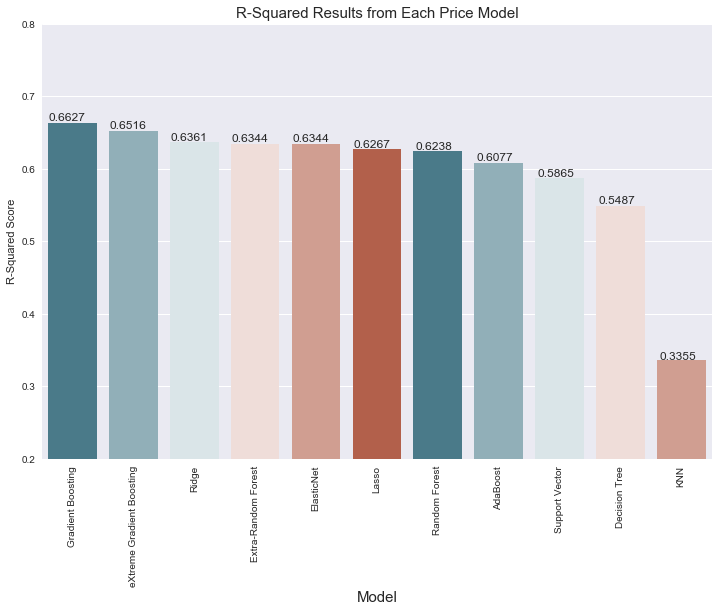

In [78]:
g = plt.figure(figsize=(12,8))
g = sns.barplot(x=price_results.index,y='R-Squared Score',data=price_results, palette=sns.diverging_palette(220, 20, sep=20))
_ = plt.xticks(rotation=90,)
_ = plt.ylim(.2,.8)
_ = plt.title('R-Squared Results from Each Price Model',size=15)
_ = plt.xlabel('Model',size=15)
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=4), (p.get_x() * 1.005, p.get_height() * 1.005))

The **3 best models** are:
* **Gradient Boosting:** It has the largest validation score with relatively low variation.
* **eXtreme Gradient Boosting:** It has the second largest validation score with relatively low variation.
* **Ridge Regression:** It has the 5 largest validation score, but a relatively low standard deviation, which makes it a better model then the other two.

We can compare these three models against that actual Test data in order to choose our model. 

### Gradient Boosting Test Score

In [79]:
gbr_p_test = GradientBoostingRegressor(learning_rate=0.1, max_features=.3,min_samples_split=8,
                                    n_estimators=200, random_state=1)

gbr_p_test.fit(new_X_train_p_gbr,y_train_p)

gbr_p_test.score(new_X_test_p_gbr,y_test_p)

0.67963186109324458

## eXtreme Gradient Boosting Test Score

In [80]:
xgb_p_test = XGBRegressor(learning_rate=0.09, max_depth=5,
                        min_child_weight=4,subsample=0.5, random_state=1)


xgb_p_test.fit(new_X_train_p_gbr, y_train_p)

xgb_p_test.score(new_X_test_p_gbr, y_test_p)

0.6784663439184212

## Ridge Test Score

In [81]:
ridge_p_test = Ridge(alpha=20, random_state=1)

ridge_p_test.fit(new_X2_train_p_ridge, y_train_p)

ridge_p_test.score(new_X2_test_p_ridge, y_test_p)

0.64758738306311037

## Feature Coef and Importances

#### Feature Coef

In [82]:
coef_df = pd.DataFrame()
coef_df['Features'] =  X2_train_p.columns[sfm2_p_ridge.get_support()]
coef_df['Coef'] = ridge_p_test.coef_
len(coef_df[coef_df['Coef'] >0])

44

In [83]:
coef_df.sort_values(by='Coef', ascending=False).head(44).T

,1,10,3,2,58,40,47,57,54,60,48,49,42,9,44,51,50,0,56,45,14,43,11,19,65,61,25,18,53,35,39,46,31,27,15,7,41,36,59,52,55,64,24,16
Features,accommodates,cleaning_fee,bedrooms,bathrooms,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Marina,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Pacific Heights,neighbourhood_cleansed_Western Addition,neighbourhood_cleansed_Mission,neighbourhood_cleansed_Nob Hill,neighbourhood_cleansed_Downtown/Civic Center,security_deposit,neighbourhood_cleansed_Haight Ashbury,neighbourhood_cleansed_North Beach,neighbourhood_cleansed_Noe Valley,review_scores_rating,neighbourhood_cleansed_Potrero Hill,neighbourhood_cleansed_Inner Richmond,Air conditioning,neighbourhood_cleansed_Financial District,last_review_days,Indoor fireplace,is_business_travel_ready_True,zipcode_94104,Patio or balcony,Hot tub,neighbourhood_cleansed_Outer Sunset,property_type_House,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Inner Sunset,Wireless Internet,Shampoo,Doorman,review_scores_cleanliness,neighbourhood_cleansed_Chinatown,property_type_Other,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Outer Richmond,neighbourhood_cleansed_Parkside,zipcode_94124,Microwave,Extra pillows and blankets
Coef,39.9082,23.8719,19.1200,17.3503,16.2869,15.4352,14.5696,14.3936,13.6112,13.3482,13.2629,13.0994,12.1921,11.7765,11.5657,11.1115,10.4057,10.2517,8.6122,7.5923,7.4851,7.3703,7.0047,6.6915,6.4788,6.4610,6.0834,6.0828,5.7505,5.2726,4.7352,4.5694,4.3494,4.1069,4.0993,4.0512,3.8747,3.7109,3.5536,2.7841,2.4375,2.1810,0.4404,0.0852


In [84]:
coef_df[coef_df['Features'].str.contains('neighbourhood_cleansed')].sort_values(by='Coef', ascending=False).head(10)

,Features,Coef
58,neighbourhood_cleansed_South of Market,16.2869
40,neighbourhood_cleansed_Castro/Upper Market,15.4352
47,neighbourhood_cleansed_Marina,14.5696
57,neighbourhood_cleansed_Russian Hill,14.3936
54,neighbourhood_cleansed_Pacific Heights,13.6112
60,neighbourhood_cleansed_Western Addition,13.3482
48,neighbourhood_cleansed_Mission,13.2629
49,neighbourhood_cleansed_Nob Hill,13.0994
42,neighbourhood_cleansed_Downtown/Civic Center,12.1921
44,neighbourhood_cleansed_Haight Ashbury,11.5657


In [85]:
coef_df[coef_df['Features'].str.contains('neighbourhood_cleansed')].sort_values(by='Coef', ascending=False).tail(10)

,Features,Coef
56,neighbourhood_cleansed_Potrero Hill,8.6122
45,neighbourhood_cleansed_Inner Richmond,7.5923
43,neighbourhood_cleansed_Financial District,7.3703
53,neighbourhood_cleansed_Outer Sunset,5.7505
39,neighbourhood_cleansed_Bernal Heights,4.7352
46,neighbourhood_cleansed_Inner Sunset,4.5694
41,neighbourhood_cleansed_Chinatown,3.8747
59,neighbourhood_cleansed_Twin Peaks,3.5536
52,neighbourhood_cleansed_Outer Richmond,2.7841
55,neighbourhood_cleansed_Parkside,2.4375


In [86]:
coef_df[coef_df['Features'].isin(amenities)].sort_values(by='Coef', ascending=False).head(10)

,Features,Coef
14,Air conditioning,7.4851
19,Indoor fireplace,6.6915
25,Patio or balcony,6.0834
18,Hot tub,6.0828
31,Wireless Internet,4.3494
27,Shampoo,4.1069
15,Doorman,4.0993
24,Microwave,0.4404
16,Extra pillows and blankets,0.0852
28,Step-free access,-1.8800


#### Feature Importances

In [155]:
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] =  X_train_p.columns[sfm_p_gbr.get_support()]
feature_importances_df['Importantances'] = gbr_p_test.feature_importances_
feature_importances_df.sort_values(by='Importantances', ascending=False).head(30)

,Features,Importantances
1,accommodates,0.0852
15,cleaning_fee,0.0776
16,last_review_days,0.0683
14,security_deposit,0.0610
8,reviews_per_month,0.0415
3,bedrooms,0.0410
7,maximum_nights,0.0402
4,beds,0.0373
18,average_len,0.0365
2,bathrooms,0.0349


<a id='model'></a>
# Model Selection

The <b> Gradient Boosting model</b> is our choice with having a <b>Test Score</b> of: <i>0.6843</i>. This model explains around 68% of the variation in the model. 

Text(0.5,1,'Variable Importance')

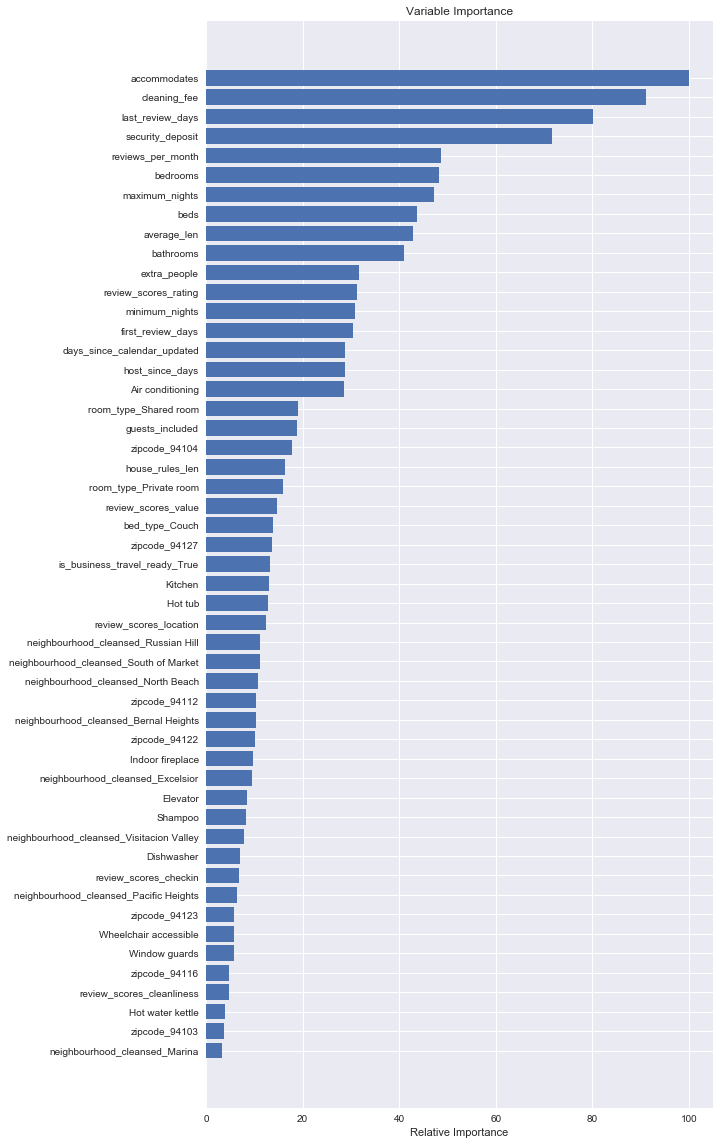

In [88]:
fig = plt.figure(figsize=(20,20))
# Plot feature importance
feature_importance = gbr_p_test.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,X_train_p.columns[sfm_p_gbr.get_support()][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

<a id='rating'></a>
<center><h1>Rating</h1></center>


<a id='parametric_r'></a>
<center><h1> Parametric Models </h1></center>

<a id='slr_r'></a>
## Simple Linear Regression

#### X1 Features

In [89]:
lr_r = LinearRegression()
lr_r, lr_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, lr_r)

Cross-Validation Scores:[ -1.78626767e+18  -4.44039803e+24  -3.96197450e+20  -2.69781321e+23
  -2.42592110e+25]
Average Cross-Validation Score: -5.793957676629474e+24


Validation Standard Deviation: 9.385622084061243e+24


Train Scores:[ 0.80033057  0.79485916  0.7833225   0.80238721  0.762731  ]
Average Train Score: 0.7887260889110123


Average MSE Score: 3.908034466868184e+26


#### SelectFromModel Feature Selection X1

In [90]:
sfm_r_lr, new_X_train_r_lr, new_X_test_r_lr = SFM(lr_r,  X_train_r_scaled, y_train_r, X_test_r_scaled,y_test_r)

Cross-Validation Scores:[-0.00071833  0.00129235  0.00029819  0.00583941 -0.01421248]
Average Cross-Validation Score: -0.0015001738616536643


Validation Standard Deviation: 0.006739670257194446


Train Scores:[ 0.01169723  0.01340828  0.01216763  0.01288321  0.01096518]
Average Train Score: 0.012224306084959658


Average MSE Score: 48.13692014780531


New X Shape: (2699, 31)
New X_train Shape: (2699, 31)


#### X2 Features

In [91]:
lr2_r = LinearRegression()
lr2_r, lr2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, lr2_r)

Cross-Validation Scores:[ -1.21668259e+26  -1.53511511e+24  -4.47567867e+24  -5.42848955e+18
  -1.37217496e+24]
Average Cross-Validation Score: -2.5810246588068894e+25


Validation Standard Deviation: 4.795120893228381e+25


Train Scores:[ 0.75728881  0.75491415  0.74493822  0.77279407  0.71931874]
Average Train Score: 0.7498507982621947


Average MSE Score: 9.01198346405745e+26


#### SelectFromModel Feature Selection X2

In [92]:
sfm2_r_lr, new_X2_train_r_lr, new_X2_test_r_lr = SFM(lr2_r,  X2_train_r_scaled, y2_train_r, X2_test_r_scaled,y2_test_r)

Cross-Validation Scores:[-0.00539694  0.00330415  0.0006458   0.00235045 -0.00016571]
Average Cross-Validation Score: 0.00014754953274047632


Validation Standard Deviation: 0.0030300051562841307


Train Scores:[ 0.00451792  0.0047286   0.0049533   0.00395534  0.00492567]
Average Train Score: 0.004616165830867347


Average MSE Score: 47.974720187362195


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


<a id='ridge_r'></a>
# Ridge Regression

#### X1 Features

In [93]:
ridge_r = Ridge(random_state=1)
ridge_r, ridge_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, ridge_r)

Cross-Validation Scores:[ 0.63168069  0.70039159  0.74658468  0.61837637  0.80807668]
Average Cross-Validation Score: 0.7010220008778951


Validation Standard Deviation: 0.07095854567719985


Train Scores:[ 0.80032924  0.79484586  0.78329892  0.8023623   0.76272846]
Average Train Score: 0.7887129559429231


Average MSE Score: 13.556608226336413


#### SelectFromModel Feature Selection X1

In [94]:
sfm_r_ridge, new_X_train_r_ridge, new_X_test_r_ridge = SFM(ridge_r, X_train_r_scaled, y_train_r, X_test_r_scaled,y_test_r)

Cross-Validation Scores:[ 0.66689785  0.7235605   0.77226394  0.65686314  0.82429713]
Average Cross-Validation Score: 0.7287765116503163


Validation Standard Deviation: 0.06331359112216829


Train Scores:[ 0.78844037  0.78316156  0.7715982   0.78951178  0.75009659]
Average Train Score: 0.7765616979353528


Average MSE Score: 12.311361146398479


New X Shape: (2699, 63)
New X_train Shape: (2699, 63)


#### X2 Features

In [95]:
ridge2_r = Ridge(random_state=1)
ridge2_r, ridge2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, ridge2_r)

Cross-Validation Scores:[ 0.62388899  0.66727658  0.70505802  0.54564571  0.77802557]
Average Cross-Validation Score: 0.6639789729433558


Validation Standard Deviation: 0.0778652103482274


Train Scores:[ 0.75730467  0.75491816  0.7449477   0.77277894  0.71934401]
Average Train Score: 0.7498586979762178


Average MSE Score: 15.33875426101532


#### SelectFromModel Feature Selection X2

In [96]:
sfm2_r_ridge, new_X2_train_r_ridge, new_X2_test_r_ridge = SFM(ridge2_r, X2_train_r_scaled, y2_train_r, X2_test_r_scaled,y2_test_r)

Cross-Validation Scores:[ 0.66400945  0.68709675  0.72227537  0.58561583  0.79043663]
Average Cross-Validation Score: 0.6898868089078344


Validation Standard Deviation: 0.06739309216052593


Train Scores:[ 0.74224939  0.74042376  0.73055     0.75686593  0.70365656]
Average Train Score: 0.7347491298038249


Average MSE Score: 14.212086302503234


New X Shape: (2699, 54)
New X_train Shape: (2699, 54)


#### Hyper-parameter tuning

In [97]:
ridge_r_gs = RidgeCV(alphas=np.arange(.1,30,.1))

ridge_r_gs, ridge_r_gs_score = Reg_Model(new_X_train_r_ridge, y_train_r, new_X_test_r_ridge, y_test_r, ridge_r_gs)

print('\n','Best Alpha: {}'.format(ridge_r_gs.alpha_))

Cross-Validation Scores:[ 0.66849547  0.72328659  0.771365    0.65908137  0.82519455]
Average Cross-Validation Score: 0.7294845954974603


Validation Standard Deviation: 0.0626563098149636


Train Scores:[ 0.78811799  0.78295209  0.7713163   0.78926551  0.74958035]
Average Train Score: 0.7762464503220011


Average MSE Score: 12.280055299092094

 Best Alpha: 29.900000000000002


<a id='lasso_r'></a>
# Lasso Regression

#### X1 Features

In [98]:
lasso_r = Lasso(random_state=1)

lasso_r, lasso_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, lasso_r)

Cross-Validation Scores:[ 0.66135158  0.68481069  0.72960762  0.61807792  0.75569048]
Average Cross-Validation Score: 0.6899076561272064


Validation Standard Deviation: 0.048794276088281296


Train Scores:[ 0.73343782  0.72539258  0.71233705  0.7372472   0.67358269]
Average Train Score: 0.7163994691990345


Average MSE Score: 14.410067217931546


#### SelectFromModel Feature Selection X1

In [99]:
sfm_r_lasso, new_X_train_r_lasso, new_X_test_r_lasso = SFM(lasso_r, X_train_r_scaled, y_train_r, X_test_r_scaled,y_test_r)

Cross-Validation Scores:[ 0.66135158  0.68481069  0.72960762  0.61807792  0.75569048]
Average Cross-Validation Score: 0.6899076561272064


Validation Standard Deviation: 0.048794276088281296


Train Scores:[ 0.73343782  0.72539258  0.71233705  0.7372472   0.67358269]
Average Train Score: 0.7163994691990345


Average MSE Score: 14.410067217931546


New X Shape: (2699, 6)
New X_train Shape: (2699, 6)


#### X2 Features

In [100]:
lasso2_r = Lasso(random_state=1)

lasso2_r, lasso2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, lasso_r)

Cross-Validation Scores:[ 0.63554741  0.63574397  0.68893378  0.57206047  0.73278107]
Average Cross-Validation Score: 0.6530133390132936


Validation Standard Deviation: 0.05442393788744582


Train Scores:[ 0.68519487  0.68125659  0.67401507  0.70200344  0.62405024]
Average Train Score: 0.6733040418367056


Average MSE Score: 16.12874669338799


#### SelectFromModel Feature Selection X2

In [101]:
sfm2_r_lasso, new_X2_train_r_lasso, new_X2_test_r_lasso = SFM(lasso_r, X2_train_r_scaled, y2_train_r, X2_test_r_scaled,y2_test_r)

Cross-Validation Scores:[ 0.63554741  0.63574397  0.68893378  0.57206047  0.73278107]
Average Cross-Validation Score: 0.6530133390132936


Validation Standard Deviation: 0.05442393788744582


Train Scores:[ 0.68519487  0.68125659  0.67401507  0.70200344  0.62405024]
Average Train Score: 0.6733040418367056


Average MSE Score: 16.12874669338799


New X Shape: (2699, 3)
New X_train Shape: (2699, 3)


#### Hyper-parameter tuning

In [102]:
lasso_r_gs = LassoCV(n_alphas=1000,random_state=1)

lasso_r_gs,lasso_r_gs_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, lasso_r_gs)

print('\n','Best Alpha:{}'.format(lasso_r_gs.alpha_))

Cross-Validation Scores:[ 0.67372131  0.71540783  0.76330651  0.65446727  0.82140763]
Average Cross-Validation Score: 0.725662111821489


Validation Standard Deviation: 0.06075525819664349


Train Scores:[ 0.77870483  0.77161602  0.75563415  0.77499188  0.73531918]
Average Train Score: 0.7632532140707801


Average MSE Score: 12.485059658900576

 Best Alpha:0.16176034118992794


<a id='en_r'></a>
# ElasticNet Regression

#### X1 Features

In [103]:
en_r = ElasticNet(random_state=1)

en_r, en_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, en_r)

Cross-Validation Scores:[ 0.64706746  0.68559624  0.7151274   0.64651402  0.75777877]
Average Cross-Validation Score: 0.6904167781460957


Validation Standard Deviation: 0.0423747697059907


Train Scores:[ 0.73191123  0.724476    0.71206332  0.73182918  0.67598773]
Average Train Score: 0.7152534941981112


Average MSE Score: 14.367399867386444


#### SelectFromModel Feature Selection X1

In [104]:
sfm_r_en, new_X_train_r_en, new_X_test_r_en = SFM(en_r, X_train_r_scaled, y_train_r, X_test_r_scaled,y_test_r)

Cross-Validation Scores:[ 0.64683796  0.68572019  0.71494154  0.6462232   0.75837673]
Average Cross-Validation Score: 0.690419923176974


Validation Standard Deviation: 0.04264800597438408


Train Scores:[ 0.73155805  0.72413401  0.71147574  0.73088275  0.67517188]
Average Train Score: 0.7146444849128054


Average MSE Score: 14.363400860196435


New X Shape: (2699, 7)
New X_train Shape: (2699, 7)


#### X2 Features

In [105]:
en2_r = ElasticNet(random_state=1)

en2_r, en2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, en2_r)

Cross-Validation Scores:[ 0.6177703   0.62441849  0.66461011  0.55139254  0.70556843]
Average Cross-Validation Score: 0.6327519734876722


Validation Standard Deviation: 0.051440126299875336


Train Scores:[ 0.66783478  0.66444597  0.6549684   0.68298803  0.60376474]
Average Train Score: 0.6548003827253507


Average MSE Score: 17.142509263830107


#### SelectFromModel Feature Selection X2

In [106]:
sfm2_r_en, new_X2_train_r_en, new_X2_test_r_en = SFM(en2_r, X2_train_r_scaled, y2_train_r, X2_test_r_scaled,y2_test_r)

Cross-Validation Scores:[ 0.61765304  0.62441846  0.66454857  0.551203    0.70556845]
Average Cross-Validation Score: 0.63267830302342


Validation Standard Deviation: 0.051499312039816995


Train Scores:[ 0.66773319  0.66444593  0.65489397  0.68252537  0.60376475]
Average Train Score: 0.6546726421276505


Average MSE Score: 17.145458411173074


New X Shape: (2699, 5)
New X_train Shape: (2699, 5)


#### Hyper-parameter Tuning

In [107]:
t0 = time()
en_r_gs = ElasticNetCV(l1_ratio=[.1, .5, .7,.9,.99, 1], random_state=1)

en_r_gs, en_r_gs_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, en_r_gs)

print('\n','Best Alpha:{}'.format(en_r_gs.alpha_))
print('\n','Best L1 Ratio:{}'.format(en_r_gs.l1_ratio_))
print("done in %0.3fs" % (time() - t0))

Cross-Validation Scores:[ 0.67286331  0.71565632  0.76199129  0.65457951  0.81835544]
Average Cross-Validation Score: 0.7246891743901266


Validation Standard Deviation: 0.059745618591309675


Train Scores:[ 0.77876165  0.77151648  0.75526551  0.77526817  0.73375308]
Average Train Score: 0.7629129777808877


Average MSE Score: 12.543614014058324

 Best Alpha:0.21029259165820488

 Best L1 Ratio:0.7
done in 35.754s


<a id='svr_r'></a>
# Support Vector Regression
#### X1 Features

In [108]:
svr_r = SVR()

svr_r, svr_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, svr_r)

Cross-Validation Scores:[ 0.40559036  0.33253673  0.35155294  0.36400629  0.28921534]
Average Cross-Validation Score: 0.34858033207588024


Validation Standard Deviation: 0.03815373999213849


Train Scores:[ 0.39435822  0.40105801  0.39396754  0.39340598  0.42388446]
Average Train Score: 0.4013348435493863


Average MSE Score: 31.718257085865627


#### X2 Features

In [109]:
svr2_r = SVR()

svr2_r, svr2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, svr2_r)

Cross-Validation Scores:[ 0.35425025  0.28067544  0.28970762  0.28572839  0.26587691]
Average Cross-Validation Score: 0.2952477208858492


Validation Standard Deviation: 0.030586287849855107


Train Scores:[ 0.34839704  0.3592823   0.35141361  0.36006807  0.36476307]
Average Train Score: 0.35678481686937535


Average MSE Score: 34.10821726853483


#### Hyper-parameter Tuning

In [110]:
t0 = time()

parameters = {'C':[10,15,20],'gamma': ['auto',.0001,.0002,.0003],'epsilon':[.003,.01,.1]}

svr_r_gs = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, svr_r, gridsearch=True, param_grid=parameters)

print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6980644608858755


Validation Standard Deviation: 0.05795553419647863


Average Train Score: 0.752336936880844


Best Estimator: SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0003,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Best Params: {'C': 20, 'epsilon': 0.1, 'gamma': 0.0003}


done in 181.760s


<a id='non_r'></a>
<center><h1>Non-Parametric Models</h1></center>

<a id='knn_r'></a>
# K-Nearest Neighbors Regression 

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### X1 Features

In [112]:
knn_r = KNeighborsRegressor()

knn_r, knn_r_score = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, knn_r)

Cross-Validation Scores:[ 0.15613497  0.30228574  0.29458805  0.26193371  0.43123583]
Average Cross-Validation Score: 0.2892356612471444


Validation Standard Deviation: 0.088118318753973


Train Scores:[ 0.59298383  0.56450277  0.57201507  0.56437769  0.4865622 ]
Average Train Score: 0.5560883119625855


Average MSE Score: 33.03726701023844


#### X2 Features

In [113]:
knn2_r = KNeighborsRegressor()

knn2_r, knn2_r_score = Reg_Model(X2_train_r_scaled, y2_train_r, X2_test_r_scaled, y2_test_r, knn2_r)

Cross-Validation Scores:[ 0.08780935  0.16398063  0.33544358  0.08724891  0.38547125]
Average Cross-Validation Score: 0.2119907449944891


Validation Standard Deviation: 0.12539745145836192


Train Scores:[ 0.53407216  0.52099243  0.49012877  0.53865954  0.44601094]
Average Train Score: 0.5059727689295092


Average MSE Score: 36.510673730502305


#### Hyper-parameter Tuning

In [114]:
t0 = time()
knn_r_grid = {'n_neighbors':np.arange(1,20,3)}

knn_r_gs = Reg_Model(X_train_r_scaled, y_train_r, X_test_r_scaled, y_test_r, knn_r, gridsearch=True, param_grid=knn_grid)

knn_r_gs.best_params_

print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.3408614756413933


Validation Standard Deviation: 0.059513697241000064


Average Train Score: 0.4548896770619688


Best Estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')


Best Params: {'n_neighbors': 10}


done in 28.945s


<a id='dt_r'></a>
# Decision Tree 

#### X1 Features

In [115]:
dt_r = DecisionTreeRegressor(random_state=1)

dt_r, dt_r_score = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, dt_r)

Cross-Validation Scores:[ 0.36389505  0.38634614  0.47348167  0.24379874  0.50164343]
Average Cross-Validation Score: 0.3938330048442062


Validation Standard Deviation: 0.09102704264217218


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 28.32914725486154


#### SelectFromModel Feature Selection X1

In [116]:
sfm_r_dt, new_X_train_r_dt, new_X_test_r_dt = SFM(dt_r, X_train_r, y_train_r, X_test_r, y_test_r)

Cross-Validation Scores:[ 0.33387981  0.37788443  0.49625261  0.420148    0.57784347]
Average Cross-Validation Score: 0.44120166442695935


Validation Standard Deviation: 0.08680080582713737


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 25.836755308183875


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


#### X2 Features

In [117]:
dt2_r = DecisionTreeRegressor(random_state=1)

dt2_r, dt2_r_score = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r, dt2_r)

Cross-Validation Scores:[ 0.14009046  0.24125401  0.37451565 -0.24887784  0.61692772]
Average Cross-Validation Score: 0.22478199977644092


Validation Standard Deviation: 0.2856557593674114


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 34.56608877894592


#### SelectFromModel Feature Selection X2

In [118]:
sfm2_r_dt, new_X2_train_r_dt, new_X2_test_r_dt = SFM(dt2_r, X2_train_r, y2_train_r, X2_test_r, y2_test_r)

Cross-Validation Scores:[ 0.13048558  0.2986412   0.40588541  0.34252057  0.52640455]
Average Cross-Validation Score: 0.3407874625212256


Validation Standard Deviation: 0.13015194375172762


Train Scores:[ 1.  1.  1.  1.  1.]
Average Train Score: 1.0


Average MSE Score: 30.17404590118876


New X Shape: (2699, 17)
New X_train Shape: (2699, 17)


#### Hyper-parameter Tuning

In [119]:
dt_grid = {'splitter':['best','random'],
           'min_samples_split':[6,7,8,9,10],
           'max_depth':[None,1,2,3,4,5,6,7,8],
           'max_features':['auto',.7,.75,.8,.85,.9],
           'random_state': [1]
             }

dt_r_gs = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, dt_r, gridsearch=True, param_grid=dt_grid)

Average Validation Score: 0.6118046756934075


Validation Standard Deviation: 0.09895085860911398


Average Train Score: 0.7306833453851157


Best Estimator: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=0.8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')


Best Params: {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 7, 'random_state': 1, 'splitter': 'random'}





<a id='ensemble_r'></a>
<center><h1> Ensemble Methods </h1></center>

Now we can try methods such as Boostings and Bagging, to improve our model.

<a id='rfr_r'></a>
# Random Forest Regression

#### X1 Features

In [120]:
rfr_r = RandomForestRegressor(random_state=1)

rfr_r, rfr_r_score = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, rfr_r)

Cross-Validation Scores:[ 0.61034916  0.68645023  0.7590062   0.61685936  0.76101081]
Average Cross-Validation Score: 0.6867351509100458


Validation Standard Deviation: 0.06550955076015176


Train Scores:[ 0.94406087  0.94488849  0.93441502  0.94188835  0.94295961]
Average Train Score: 0.9416424708408705


Average MSE Score: 14.401492200920774


#### SelectFromModel Feature Selection X1

In [121]:
sfm_r_rfr, new_X_train_r_rfr, new_X_test_r_rfr = SFM(rfr_r, X_train_r, y_train_r, X_test_r,y_test_r)

Cross-Validation Scores:[ 0.56338621  0.68958346  0.7644139   0.64305107  0.75141044]
Average Cross-Validation Score: 0.6823690148036187


Validation Standard Deviation: 0.0738280957962439


Train Scores:[ 0.94672467  0.94307341  0.934663    0.94379615  0.94431425]
Average Train Score: 0.942514299199724


Average MSE Score: 14.560065416065417


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


#### X2 Features

In [122]:
rfr2_r = RandomForestRegressor(random_state=1)

rfr2_r, rfr2_r_score = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r, rfr2_r)

Cross-Validation Scores:[ 0.60892698  0.54078543  0.68364234  0.51497469  0.71521749]
Average Cross-Validation Score: 0.6127093876301019


Validation Standard Deviation: 0.07781879802824307


Train Scores:[ 0.92910794  0.93233575  0.92441358  0.93869851  0.9251711 ]
Average Train Score: 0.9299453768802918


Average MSE Score: 17.96334042465471


#### SelectFromModel Feature Selection X2

In [123]:
sfm2_r_rfr, new_X2_train_r_rfr, new_X2_test_r_rfr = SFM(rfr2_r, X2_train_r, y2_train_r, X2_test_r,y2_test_r)

Cross-Validation Scores:[ 0.60596802  0.53791206  0.66200238  0.55627488  0.74002343]
Average Cross-Validation Score: 0.6204361556310556


Validation Standard Deviation: 0.07370900595547439


Train Scores:[ 0.93354121  0.93459983  0.92088173  0.93859974  0.92480841]
Average Train Score: 0.9304861837852831


Average MSE Score: 17.511474919260632


New X Shape: (2699, 18)
New X_train Shape: (2699, 18)


#### Hyper-parameter Tuning

In [124]:
t0 = time()
parameters = { "n_estimators": [200],
              "min_samples_split": [2,8,16],
              'max_depth':[None,8,12],
              'max_features':[.3,.6,.8,'auto'],
              'random_state':[1]
             }

rfr_r_gs = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, rfr_r, param_grid = parameters, gridsearch=True)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.7162800025374415


Validation Standard Deviation: 0.041197528534237304


Average Train Score: 0.9365517874644289


Best Estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


Best Params: {'max_depth': 12, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 1}


done in 175.187s


<a id='extra_r'></a>
# Extra-Random Forest Regression

#### X1 Features

In [125]:
extra_r = ExtraTreesRegressor(random_state=1)

extra_r, extra_r_score = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, extra_r)

Cross-Validation Scores:[ 0.58952621  0.64196253  0.6806861   0.58655979  0.7556017 ]
Average Cross-Validation Score: 0.6508672668724766


Validation Standard Deviation: 0.06298560806757128


Train Scores:[ 0.99999928  1.          1.          0.99999832  1.        ]
Average Train Score: 0.9999995200256759


Average MSE Score: 16.01252459286745


#### SelectFromModel Feature Selection X1

In [126]:
sfm_r_extra, new_X_train_r_extra, new_X_test_r_extra = SFM(extra_r, X_train_r, y_train_r, X_test_r, y_test_r)

Cross-Validation Scores:[ 0.56755505  0.68770424  0.72451738  0.63037977  0.7629671 ]
Average Cross-Validation Score: 0.674624707547032


Validation Standard Deviation: 0.06911766261419974


Train Scores:[ 1.          0.99999981  0.99999962  0.99999963  1.        ]
Average Train Score: 0.9999998105758884


Average MSE Score: 14.86042548615406


New X Shape: (2699, 16)
New X_train Shape: (2699, 16)


#### X2 Features

In [127]:
extra2_r = ExtraTreesRegressor(random_state=1)

extra2_r, extra2_r_score = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r, extra2_r)

Cross-Validation Scores:[ 0.53861272  0.50754017  0.66687544  0.46371262  0.71132124]
Average Cross-Validation Score: 0.5776124361200585


Validation Standard Deviation: 0.09513169596817916


Train Scores:[ 0.99999928  0.99999981  0.99999923  0.99999925  0.99999978]
Average Train Score: 0.9999994715093139


Average MSE Score: 19.386910458324742


#### SelectFromModel Feature Selection X2

In [128]:
sfm2_r_extra, new_X2_train_r_extra, new_X2_test_r_extra = SFM(extra2_r, X2_train_r, y2_train_r, X2_test_r, y2_test_r)

Cross-Validation Scores:[ 0.56606793  0.57202716  0.6466519   0.5163727   0.74874059]
Average Cross-Validation Score: 0.6099720565468546


Validation Standard Deviation: 0.08090777788037627


Train Scores:[ 0.99999982  1.          0.99999885  0.99999869  0.9999989 ]
Average Train Score: 0.9999992532744555


Average MSE Score: 17.817906617192328


New X Shape: (2699, 20)
New X_train Shape: (2699, 20)


#### Hyper-parameter Tuning

In [129]:
t0 = time()
parameters = {'n_estimators': [200],
              "bootstrap": [True, False],
              'min_samples_split':[4,6,10],
              'max_depth':[None,3,10],
              'max_features':[.3,.6,'auto'],
              'random_state':[1]
             }

extra_r_gs = Reg_Model(new_X_train_r_extra, y_train_r, new_X_test_r_extra, y_test_r,extra_r,gridsearch=True, param_grid=parameters)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.7266410632341096


Validation Standard Deviation: 0.050464765333707605


Average Train Score: 0.8699126269869307


Best Estimator: ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=10,
          max_features=0.6, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)


Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 0.6, 'min_samples_split': 4, 'n_estimators': 200, 'random_state': 1}


done in 32.781s


<center><h1> Boosting</h1></center>

<a id='ada_r'></a>
#  AdaBoost Regressor

## Simple AdaBoost Regressor
#### X1 Features

In [130]:
ada_r = AdaBoostRegressor(n_estimators = 200,random_state=1)
ada_r = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, ada_r)

Cross-Validation Scores:[-0.05150068  0.08653663  0.27656316  0.23451597  0.33010298]
Average Cross-Validation Score: 0.17524361126733068


Validation Standard Deviation: 0.13931417144279207


Train Scores:[ 0.37558755  0.31196444  0.37843172  0.42981789  0.0748708 ]
Average Train Score: 0.31413447966244024


Average MSE Score: 38.284176208947734


#### X2 Features

In [131]:
ada2_r = AdaBoostRegressor(n_estimators=200,random_state=1)
ada2_r = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r, ada2_r)

Cross-Validation Scores:[ 0.00943395 -0.13435116  0.33826122  0.22646542  0.40413796]
Average Cross-Validation Score: 0.1687894789816822


Validation Standard Deviation: 0.202348475710677


Train Scores:[ 0.40593486  0.13393366  0.43355573  0.4263648   0.19957455]
Average Train Score: 0.3198727212730705


Average MSE Score: 38.34313681668759


#### AdaBoost Regressor with Best Decision Tree as Base Estimator

In [132]:
t0 = time()
best_dt_r = DecisionTreeRegressor(max_depth= 5, max_features= .8,
                                min_samples_split=7, splitter= 'random',
                                random_state=1
                                 )

ada_best_dt_r = AdaBoostRegressor(n_estimators = 200, base_estimator=best_dt_r,random_state=1)

ada_best_dt_r = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r,ada_best_dt_r)
print("done in %0.3fs" % (time() - t0))

Cross-Validation Scores:[-0.21213848  0.31213087  0.13743215  0.15453109  0.45991046]
Average Cross-Validation Score: 0.17037321864237978


Validation Standard Deviation: 0.22431153757615907


Train Scores:[ 0.28753315  0.46792997  0.26787396  0.3779302   0.33497677]
Average Train Score: 0.34724881095978233


Average MSE Score: 37.39274478428025
done in 54.085s


#### Hyper-parameter Tuning

In [133]:
t0= time()
param_grid = {'n_estimators':[200],
              'learning_rate':[.01,.02,.03,.04,.05],
             }

ada_best_dt_r = AdaBoostRegressor(n_estimators=200, base_estimator=best_dt_r, random_state=1)

ada_r_gs = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r, ada_best_dt_r, gridsearch=True, param_grid=param_grid)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.6890654778698304


Validation Standard Deviation: 0.05416624127036092


Average Train Score: 0.8124426792259145


Best Estimator: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=0.8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random'),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=1)


Best Params: {'learning_rate': 0.01, 'n_estimators': 200}


done in 53.479s


<a id='gbr_r'></a>
# Gradient Boosting Regression

#### X1 Features

In [134]:
gbr_r = GradientBoostingRegressor(random_state=1)

gbr_r, gbr_r_score = Reg_Model(X_train_r, y_train_r, X_test_r,y_test_r,gbr_r)

Cross-Validation Scores:[ 0.65719216  0.6490714   0.7665073   0.60389222  0.8068737 ]
Average Cross-Validation Score: 0.6967073546713425


Validation Standard Deviation: 0.07675146912733734


Train Scores:[ 0.8879344   0.88944035  0.88470001  0.88543365  0.86793063]
Average Train Score: 0.883087807068026


Average MSE Score: 13.810117064363164


#### SelectFromModel Feature Selection X1

In [135]:
sfm_gbr_r, new_X_train_r_gbr, new_X_test_r_gbr = SFM(gbr_r, X_train_r, y_train_r, X_test_r,y_test_r)

Cross-Validation Scores:[ 0.65170376  0.64144696  0.77952837  0.65825877  0.81222189]
Average Cross-Validation Score: 0.7086319501725649


Validation Standard Deviation: 0.07217932690915346


Train Scores:[ 0.88736995  0.88430616  0.88188945  0.8854682   0.8624249 ]
Average Train Score: 0.8802917323380617


Average MSE Score: 13.266605569711611


New X Shape: (2699, 39)
New X_train Shape: (2699, 39)


#### X2 Features

In [136]:
gbr2_r = GradientBoostingRegressor(random_state=1)

gbr2_r, gbr2_r_score = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r,gbr2_r)

Cross-Validation Scores:[ 0.6560556   0.57722469  0.70370666  0.51330405  0.77205741]
Average Cross-Validation Score: 0.6444696796007718


Validation Standard Deviation: 0.09126685649307874


Train Scores:[ 0.85000001  0.85385433  0.85030463  0.86105547  0.82338634]
Average Train Score: 0.8477201577640153


Average MSE Score: 16.319925607178163


#### SelectFromModel Feature Selection X2

In [137]:
sfm2_gbr_r, new_X2_train_r_gbr, new_X2_test_r_gbr = SFM(gbr2_r, X2_train_r, y2_train_r, X2_test_r,y2_test_r)

Cross-Validation Scores:[ 0.6417067   0.60361914  0.74199056  0.52679602  0.77264811]
Average Cross-Validation Score: 0.657352104825211


Validation Standard Deviation: 0.09014847705914802


Train Scores:[ 0.84883641  0.85359463  0.8509677   0.85696897  0.82167096]
Average Train Score: 0.8464077323470406


Average MSE Score: 15.696377770693308


New X Shape: (2699, 36)
New X_train Shape: (2699, 36)


#### Hyper-parameter Tuning

In [138]:
t0= time()
params = {'n_estimators':[200],
          'learning_rate':[.01,.02,.03,.04,.05],
          'subsample':[.7,.8,1],
          'random_state':[1]
         }

gbr_r_gs = Reg_Model(new_X_train_r_gbr, y_train_r, new_X_test_r_gbr, y_test_r, gbr_r, gridsearch=True, param_grid=params)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.7242749414643672


Validation Standard Deviation: 0.05218437349866777


Average Train Score: 0.8620552524283013


Best Estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=1,
             subsample=0.7, verbose=0, warm_start=False)


Best Params: {'learning_rate': 0.03, 'n_estimators': 200, 'random_state': 1, 'subsample': 0.7}


done in 18.806s


<a id='xgbr_r'></a>
# eXtreme Gradient Boosting Regression

#### X1 Features

In [139]:
xgb_r = XGBRegressor(random_state=1)

xgb_r, xgb_r_score = Reg_Model(X_train_r, y_train_r, X_test_r, y_test_r,xgb_r)

Cross-Validation Scores:[ 0.6626878   0.69141325  0.78397436  0.64744071  0.81932018]
Average Cross-Validation Score: 0.7209672584679554


Validation Standard Deviation: 0.06829243106686934


Train Scores:[ 0.88272768  0.88236858  0.87431447  0.88012727  0.85917626]
Average Train Score: 0.8757428531821138


Average MSE Score: 12.677763453886415


#### SelectFromModel Feature Selection X1

In [140]:
sfm_gbr_r, new_X_train_r_gbr, new_X_test_r_gbr = SFM(xgb_r, X_train_r, y_train_r, X_test_r, y_test_r)

Cross-Validation Scores:[ 0.66812563  0.68780635  0.79093725  0.65674379  0.82591316]
Average Cross-Validation Score: 0.7259052349781063


Validation Standard Deviation: 0.06899864063787


Train Scores:[ 0.88213283  0.88109966  0.87446021  0.88160466  0.85400384]
Average Train Score: 0.8746602391727913


Average MSE Score: 12.437351334878889


New X Shape: (2699, 39)
New X_train Shape: (2699, 39)


#### X2 Features

In [141]:
xgb2_r = XGBRegressor(random_state=1)

xgb2_r, xgb2_r_score = Reg_Model(X2_train_r, y2_train_r, X2_test_r, y2_test_r,xgb2_r)

Cross-Validation Scores:[ 0.64761915  0.60811203  0.70373705  0.55521795  0.7823099 ]
Average Cross-Validation Score: 0.6593992146886289


Validation Standard Deviation: 0.0783527427568017


Train Scores:[ 0.84514629  0.85045842  0.84646289  0.85773096  0.81334452]
Average Train Score: 0.842628618110483


Average MSE Score: 15.595200395128265


#### SelectFromModel Feature Selection X2

In [142]:
sfm2_gbr_r, new_X2_train_r_gbr, new_X2_test_r_gbr = SFM(xgb2_r, X2_train_r, y2_train_r, X2_test_r, y2_test_r)

Cross-Validation Scores:[ 0.65327192  0.58980903  0.70776308  0.56556248  0.78211   ]
Average Cross-Validation Score: 0.6597033010461595


Validation Standard Deviation: 0.0788444133340354


Train Scores:[ 0.8393321   0.8492246   0.8443886   0.85100807  0.81220943]
Average Train Score: 0.8392325600854564


Average MSE Score: 15.60500898643287


New X Shape: (2699, 33)
New X_train Shape: (2699, 33)


#### Hyper-parameter Tuning

In [143]:
t0 = time()
xgb_params = {'learning_rate':[.02,.04,.05,.06,.07,.08],
              'subsample':[.5,.6,.7],
              'n_estimators':[200],
              'random_state':[1]
             }

xgb_r_gs = Reg_Model(new_X_train_r_gbr, y_train_r, new_X_test_r_gbr, y_test_r, xgb_r, gridsearch=True, param_grid=xgb_params)
print("done in %0.3fs" % (time() - t0))

Average Validation Score: 0.7296639299171241


Validation Standard Deviation: 0.06342659674274964


Average Train Score: 0.9083146190565304


Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)


Best Params: {'learning_rate': 0.08, 'n_estimators': 200, 'random_state': 1, 'subsample': 0.7}


done in 18.624s


<a id='results_r'></a>
<center><h1> Results - Ratings</h1></center>

In [144]:
ratings_model = ['Ridge','Lasso', 'ElasticNet', 'Support Vector','KNN','Decision Tree','Random Forest',
                 'Extra-Random Forest','AdaBoost','Gradient Boosting','eXtreme Gradient Boosting']
ratings_models1 = [ridge_r_gs_score,lasso_r_gs_score, en_r_gs_score]
ratings_models2 = [svr_r_gs,knn_r_gs,dt_r_gs,rfr_r_gs,extra_r_gs,ada_r_gs,gbr_r_gs,xgb_r_gs]

ratings_results = pd.DataFrame(columns=['R-Squared Score', 'Standard Deviation', 'Train Score'],index=ratings_model)

for i, model in enumerate(ratings_models1):
    ratings_results.iloc[i,0] = np.mean(model['test_score'])
    ratings_results.iloc[i,1] = np.std(model['test_score'])
    ratings_results.iloc[i,2] = np.mean(model['train_score'])
for i, model in enumerate(ratings_models2):
    ratings_results.iloc[i+3,0] = model.best_score_
    ratings_results.iloc[i+3,1] = model.cv_results_['std_test_score'][model.best_index_]
    ratings_results.iloc[i+3,2] = model.cv_results_['mean_train_score'][model.best_index_]

ratings_results = ratings_results.sort_values(by='R-Squared Score', ascending=False)
ratings_results

,R-Squared Score,Standard Deviation,Train Score
eXtreme Gradient Boosting,0.7297,0.0634,0.9083
Ridge,0.7295,0.0627,0.7762
Extra-Random Forest,0.7266,0.0505,0.8699
Lasso,0.7257,0.0608,0.7633
ElasticNet,0.7247,0.0597,0.7629
Gradient Boosting,0.7243,0.0522,0.8621
Random Forest,0.7163,0.0412,0.9366
Support Vector,0.6981,0.0580,0.7523
AdaBoost,0.6891,0.0542,0.8124
Decision Tree,0.6118,0.0990,0.7307


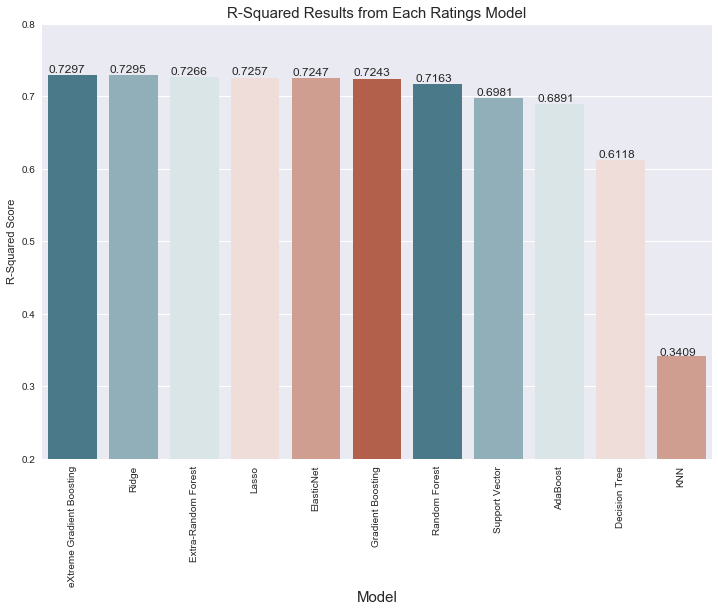

In [145]:
g = plt.figure(figsize=(12,8))
g = sns.barplot(x=ratings_results.index,y='R-Squared Score',data=ratings_results, palette=sns.diverging_palette(220, 20, sep=20))
_ = plt.xticks(rotation=90,)
_ = plt.ylim(.2,.8)
_ = plt.title('R-Squared Results from Each Ratings Model',size=15)
_ = plt.xlabel('Model',size=15)
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=4), (p.get_x() * 1.005, p.get_height() * 1.005))

The top models are:

* <b>Extra-Random Forest:</b>  It has the third largest validation score, but a much lower standard deviation the top scoring model.
* <b>eXtreme Gradient Boosting:</b> It is the top validation score
* <b>ElasticNet Regression:</b> It has much less variation the  the top scores that are right around its score.

We can compare these three models against that actual Test data in order to choose our model.

<a id='results_r'></a>
<center><h1>Results - Rating</h1></center>


### Extra-Random Forest Test Score

In [146]:
extra_r_test = ExtraTreesRegressor(bootstrap=True, max_depth=10, max_features=0.6, min_samples_split=4,
                                       n_estimators=200, random_state=1)
                                    
extra_r_test.fit(new_X_train_r_extra,y_train_r)

extra_r_test.score(new_X_test_r_extra,y_test_r)

0.72335207196807438

### eXtreme Gradient Boosting Test Score

In [147]:
xgb_r_test = GradientBoostingRegressor(learning_rate=0.08, subsample=.7,
                                    n_estimators=200, random_state=1)

xgb_r_test.fit(new_X_train_r_gbr,y_train_r)

xgb_r_test.score(new_X_test_r_gbr,y_test_r)

0.73045053348129785

### ElasticNet Regression Test Score

In [148]:
en_r_test = ElasticNet(l1_ratio=.7, alpha=0.21029)

en_r_test.fit(X_train_r_scaled,y_train_r)

en_r_test.score(X_test_r_scaled,y_test_r)

0.72817703358035168

#### Coefficients

In [149]:
en_r_df = pd.DataFrame()
en_r_df['Features'] =  X_train_r.columns
en_r_df['Coef'] = en_r_test.coef_
len(en_r_df[en_r_df['Coef'] >0])

15

In [150]:
en_r_df.sort_values(by='Coef', ascending=False).head(15).T

,13,17,12,15,16,14,0,90,83,216,24,219,64,203,127
Features,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_communication,review_scores_location,review_scores_checkin,price,Kitchen,Hot tub,zipcode_94107,host_since_days,zipcode_94110,Extra pillows and blankets,neighbourhood_cleansed_Russian Hill,Washer
Coef,1.8545,1.6817,1.4576,1.1791,0.4874,0.3924,0.2458,0.0847,0.0408,0.0216,0.0137,0.0129,0.0039,0.0013,0.0008


In [151]:
en_r_df[en_r_df['Features'].str.contains('neighbourhood_cleansed')].sort_values(by='Coef', ascending=False).head(10)

,Features,Coef
203,neighbourhood_cleansed_Russian Hill,0.0013
202,neighbourhood_cleansed_Presidio Heights,-0.0000
195,neighbourhood_cleansed_Outer Mission,0.0000
196,neighbourhood_cleansed_Outer Richmond,-0.0000
197,neighbourhood_cleansed_Outer Sunset,-0.0000
198,neighbourhood_cleansed_Pacific Heights,0.0000
200,neighbourhood_cleansed_Potrero Hill,0.0000
201,neighbourhood_cleansed_Presidio,0.0000
175,neighbourhood_cleansed_Bernal Heights,0.0000
176,neighbourhood_cleansed_Castro/Upper Market,0.0000


#### Feature Importances

In [152]:
rfr_r_test = RandomForestRegressor(max_depth=12,max_features=0.3,min_samples_split=2,
                                   n_estimators=200,random_state=1).fit(X_train_r, y_train_r)

feature_importances_df_r = pd.DataFrame()
feature_importances_df_r['Features'] =  X_train_p.columns
feature_importances_df_r['Importantances'] = rfr_r_test.feature_importances_
len(feature_importances_df_r[feature_importances_df_r['Importantances'] >0])

234

In [153]:
feature_importances_df_r.sort_values(by='Importantances', ascending=False).head(50).T

,17,12,13,15,14,16,8,0,10,25,24,22,6,19,20,11,18,7,9,23,241,2,158,3,1,21,212,4,180,80,177,5,141,169,77,242,76,59,218,27,32,79,144,125,93,153,87,139,26,61
Features,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_checkin,review_scores_location,number_of_reviews,review_scores_rating,reviews_per_month,first_review_days,host_since_days,average_len,minimum_nights,cleaning_fee,last_review_days,days_since_calendar_updated,security_deposit,maximum_nights,calculated_host_listings_count,house_rules_len,host_is_superhost_True,bathrooms,property_type_Hostel,bedrooms,accommodates,extra_people,zipcode_94102,beds,neighbourhood_cleansed_Downtown/Civic Center,Heating,neighbourhood_cleansed_Chinatown,guests_included,cancellation_policy_super_strict_60,room_type_Private room,Hair dryer,instant_bookable_True,Gym,Dryer,zipcode_94109,total_handicap_amenities,Air conditioning,Hangers,host_response_time_within an hour,TV,Lock on bedroom door,property_type_Condominium,Internet,cancellation_policy_strict,total_child_care_amenities,Elevator
Importantances,0.2105,0.1840,0.1811,0.0981,0.0512,0.0317,0.0190,0.0149,0.0137,0.0124,0.0103,0.0091,0.0086,0.0080,0.0078,0.0077,0.0071,0.0066,0.0059,0.0045,0.0037,0.0036,0.0029,0.0028,0.0027,0.0023,0.0023,0.0021,0.0019,0.0018,0.0016,0.0015,0.0015,0.0015,0.0015,0.0014,0.0014,0.0013,0.0013,0.0013,0.0013,0.0013,0.0012,0.0012,0.0011,0.0011,0.0011,0.0011,0.0011,0.0010


<a id='model_r'></a>
# Model Selection

The <b> eXtreme Gradient Boosting model</b> is our choice for predicting ratings, with having a <b>Test Score</b> of: <i>0.7305</i>. This model explains around 73% of the variation in the model. 

Text(0.5,1,'Variable Importance')

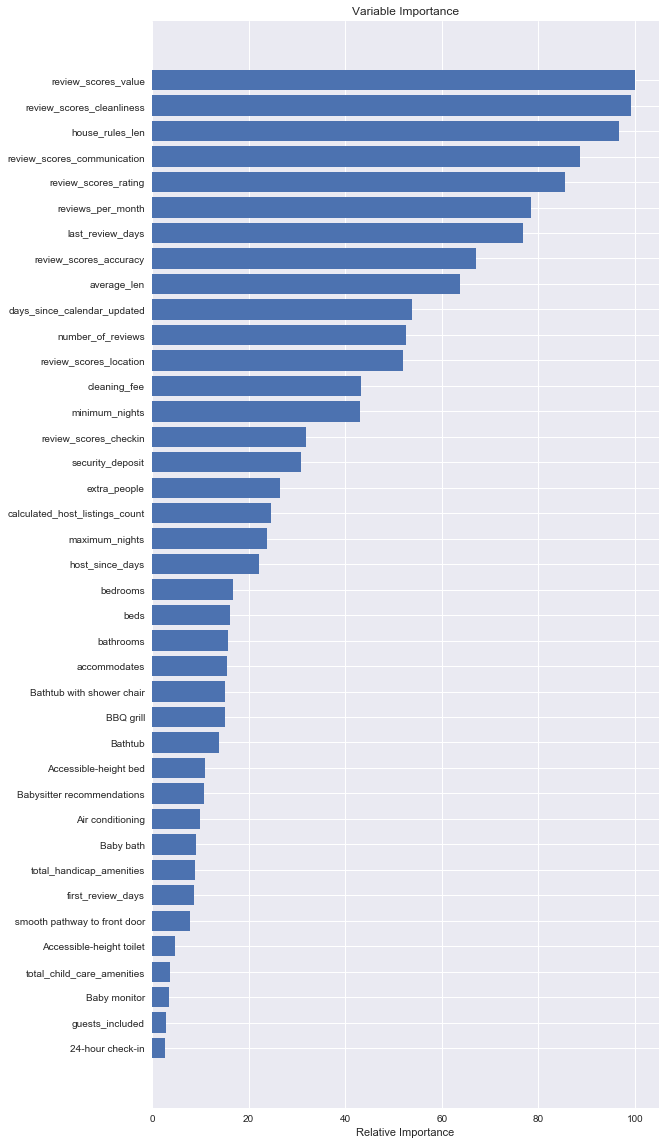

In [154]:
fig = plt.figure(figsize=(20,20))
# Plot feature importance
feature_importance = xgb_r_test.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_p.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

<a id='conclusion'></a>
<center><h1>Conslusion</h1></center>

## Price
The <b> Gradient Boosting model</b> is our choice with having a <b>Test Score</b> of: <i>0.6843</i>. This model explains around 68% of the variation in the model. 

Looking at the feature's coefficients and feature importances, we get a better understanding of how features impact the price for a listing in San Francisco. 
* The size of the listings (bedrooms, accommodates, bathrooms) are very important features for predicting price.
* Higher ratings tend to bring in higher prices for listings.
* Renting an Entire home/apt significantly impact the price
* Location of the Airbnb:
    * The best places to rent out an Airbnb to increase reveneue are South of Market, Castro/Upper Market, and the Marina.
    * The worst locations to rent out an Airbnb in San Francisco are Parkside, Outer Richmond, and Twin Peaks. 
    * Having a high "walk score" and being closer to the more populated spots in San Francisco is important for increasing revenue.
* The best amenities that a host can supply to increase their reveneue are: Air conditioning, an indoor fireplace, patio or balcony, a hot tub, wireless internet, shampoo, a doorman, a microwave, and extra-pillows and blankets.
* The text length of a listings ad, is considered an important feature and used around 4% of the time when making predictions. 

## Ratings

The <b> eXtreme Gradient Boosting model</b> is our choice for predicting ratings, with having a <b>Test Score</b> of: <i>0.7305</i>. This model explains around 73% of the variation in the model. 

Looking at the feature's importances and the features' coefficeients we get a better understanding of how features impact the price for a listing in San Francisco. Some interesting insights on the relationship with feature and ratings are:
* The value a customer feels, the accuracy of the listings, and the cleanliness of the listing are the top 3 most important factors.A host should focus on these three factors if they want to have the largest postive impact on their ratings.
* No amenities had strong importances, yet there was a few that can make an impact (coefficients from ElasticNet).
    * Having a kitchen, Hot tub, and Extra pillows and blankets have the strongest relationship with higher ratings
* Location / Neighborhood does not have a strong affect on ratings. 
* The longer a host has been a host on Airbnb, (host_since_days, first_review_days,numer_of_reviews) the higher their ratings tend to be. This may be due to the host learning from the experience and providing better service over time.
* More expernsive listings tend to have higher reviews. 